#  2018-2020: Percentage for current smoking people in Age group

[1] "----------ANOVA with intercept----------"
[1] "if P(>F)<0.05, there is indeed a difference in the levels."


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Break_Out,5,6331.399,1266.27980,73.86187,7.281387e-51
Residuals,312,5348.894,17.14389,NA,NA


[1] "----------Fited model without intercept----------"



Call:
lm(formula = Data_value ~ Break_Out - 1, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.0498  -2.6665  -0.0965   2.5308  12.3498 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
Break_Out18-24   9.3491     0.5687   16.44   <2e-16 ***
Break_Out25-34  18.5102     0.5687   32.55   <2e-16 ***
Break_Out35-44  20.3798     0.5687   35.83   <2e-16 ***
Break_Out45-54  17.6466     0.5687   31.03   <2e-16 ***
Break_Out55-64  17.7728     0.5687   31.25   <2e-16 ***
Break_Out65+     9.2566     0.5687   16.28   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.141 on 312 degrees of freedom
Multiple R-squared:  0.9392,	Adjusted R-squared:  0.938 
F-statistic: 802.9 on 6 and 312 DF,  p-value: < 2.2e-16


[1] "----------Fited model without intercept ANOVA----------"


Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
317,11680.293,NA,NA,NA,NA
312,5348.894,5,6331.399,73.86187,7.281387e-51


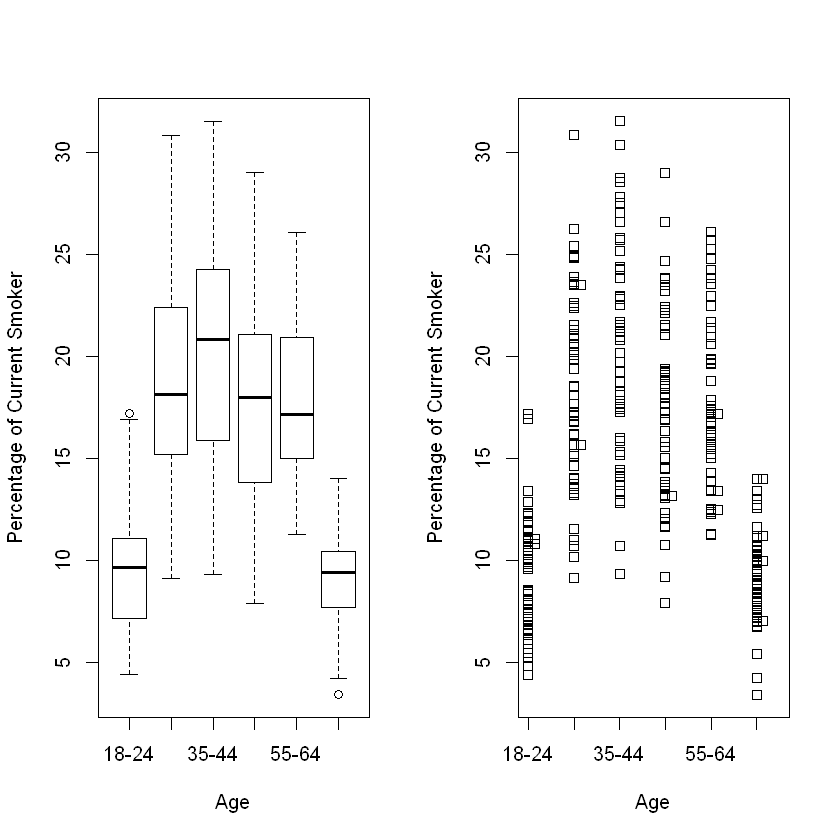

integer(0)

[1] "----------Levene's Test----------"
[1] "if P(>F)>0.05, there is no evidence of non-constant variance."


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Break_Out,5,297.1068,59.421353,10.52205,2.383878e-09
Residuals,312,1761.9623,5.647315,NA,NA


[1] "----------Comparison Test----------"
[1] "----------Non-constant Var----------"



	Pairwise comparisons using Tamhane's T2-test for unequal variances

data: data$Data_value and data$Break_Out
alternative hypothesis: two.sided
P value adjustment method: T2 (Sidak)
H0


                   t value Pr(>|t|)    
25-34 - 18-24 == 0  12.150  < 2e-16 ***
35-44 - 18-24 == 0  13.075  < 2e-16 ***
45-54 - 18-24 == 0  11.315  < 2e-16 ***
55-64 - 18-24 == 0  12.172  < 2e-16 ***
65+ - 18-24 == 0    -0.187 1.000000    
35-44 - 25-34 == 0   1.888 0.616104    
45-54 - 25-34 == 0  -0.962 0.997965    
55-64 - 25-34 == 0  -0.853 0.999477    
65+ - 25-34 == 0   -12.930  < 2e-16 ***
45-54 - 35-44 == 0  -2.805 0.086933   .
55-64 - 35-44 == 0  -2.762 0.098184   .
65+ - 35-44 == 0   -13.739  < 2e-16 ***
55-64 - 45-54 == 0   0.149 1.000000    
65+ - 45-54 == 0   -12.091  < 2e-16 ***
65+ - 55-64 == 0   -13.099  < 2e-16 ***


---
Signif. codes: 0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


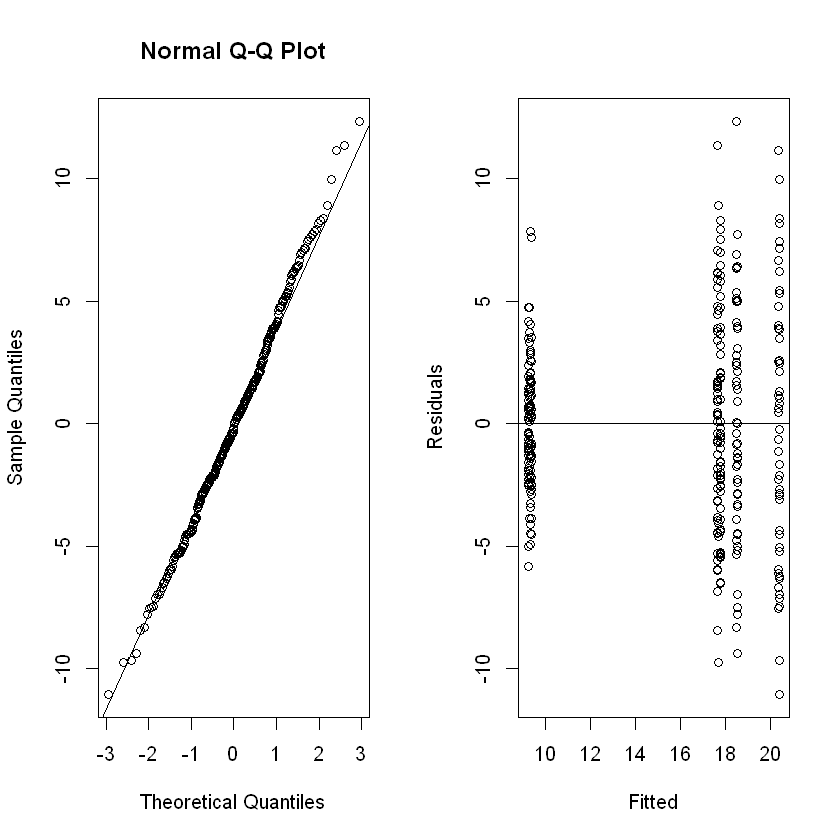

In [62]:
data = read.csv("C:/Users/Jun/Desktop/Courses/Datathon/isCurrent2020Age.csv")
#data = read.csv("C:/Users/Jun/Desktop/Courses/Datathon/isCurrent2019Age.csv")
#data = read.csv("C:/Users/Jun/Desktop/Courses/Datathon/isCurrent2018Age.csv")
data$Break_Out=factor(data$Break_Out)
par(mfrow=c(1,2))
plot(Data_value~Break_Out,data,xlab="Age",ylab="Percentage of Current Smoker")
stripchart(Data_value~Break_Out,data,vertical=TRUE,method="stack",xlab="Age",ylab="Percentage of Current Smoker")
print("----------ANOVA with intercept----------")
print("if P(>F)<0.05, there is indeed a difference in the levels.")
lm = lm(Data_value~Break_Out,data)
#summary(lm)
anova(lm)
print("----------Fited model without intercept----------")
lmodi = lm(Data_value~Break_Out-1,data)
summary(lmodi)
print("----------Fited model without intercept ANOVA----------")
lmnull=lm(Data_value~1,data)
anova(lmnull,lmodi)
qqnorm(residuals(lm))
qqline(residuals(lm))
plot(jitter(fitted(lm)),residuals(lm),xlab="Fitted",ylab="Residuals")+abline(h=0)
print("----------Levene's Test----------")
print("if P(>F)>0.05, there is no evidence of non-constant variance.")
med = with(data,tapply(Data_value,Break_Out,median))
ar = with(data,abs(Data_value-med[Break_Out]))
anova(lm(ar~Break_Out,data))
if(vartest$`Pr(>F)`[1]<0.05){
    print("----------Transformation----------")
    require(MASS)
    boxcox(lm,plotit=T,lambda=seq(0.05,0.5,by=0.01))
    lmtr = lm((log(Data_value/(100-Data_value)))~Break_Out,data)
    summary(lmtr)
    par(mfrow=c(1,2))
    qqnorm(residuals(lmtr))
    qqline(residuals(lmtr))
    plot(jitter(fitted(lmtr)),residuals(lmtr),xlab="Fitted",ylab="Residuals")+abline(h=0)
    print("----------Levene's Test with Transformation----------")
    print("if P(>F)>0.05, there is no evidence of non-constant variance.")
    medtr = with(data,tapply((log(Data_value/(100-Data_value))),Break_Out,median))
    artr = with(data,abs((log(Data_value/(100-Data_value)))-medtr[Break_Out]))
    anova(lm(artr~Break_Out,data))
}
print("----------Comparison Test----------")
library(PMCMRplus)
vartest=anova(lm(ar~Break_Out,data))
if(vartest$`Pr(>F)`[1]<0.05){
    print("----------Non-constant Var----------")
    summary(tamhaneT2Test(data$Data_value,data$Break_Out))
}else{
    print("----------Constant Var----------")
    print(tci <- TukeyHSD(aov(Data_value~Break_Out,data)))
    plot(tci)
}

#  2018-2020: Percentage for current smoking people in Gender group

[1] "----------ANOVA with intercept----------"
[1] "if P(>F)<0.05, there is indeed a difference in the levels."


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Break_Out,1,271.8722,271.87224,21.80007,9.06916e-06
Residuals,104,1297.0011,12.47116,NA,NA


[1] "----------Fited model without intercept----------"



Call:
lm(formula = Data_value ~ Break_Out - 1, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.6108 -2.6202 -0.0742  2.6600  8.6923 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
Break_OutFemale  13.7577     0.4851   28.36   <2e-16 ***
Break_OutMale    16.9608     0.4851   34.97   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.531 on 104 degrees of freedom
Multiple R-squared:  0.9512,	Adjusted R-squared:  0.9503 
F-statistic:  1013 on 2 and 104 DF,  p-value: < 2.2e-16


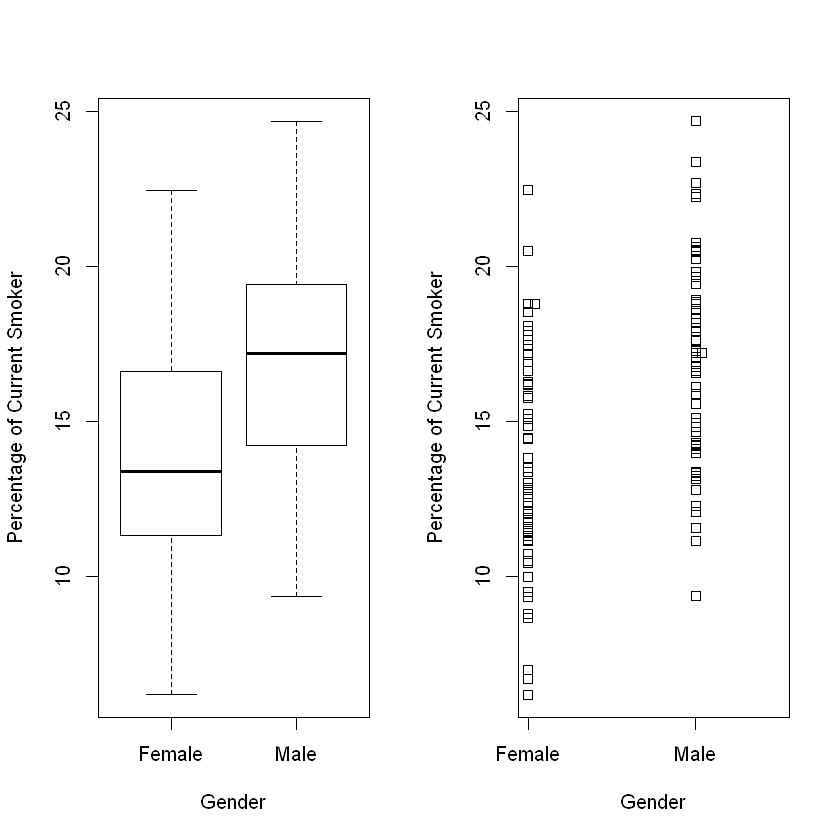

integer(0)

[1] "----------Levene's Test----------"
[1] "if P(>F)>0.05, there is no evidence of non-constant variance."


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Break_Out,1,1.360756,1.360756,0.3384499,0.5619843
Residuals,104,418.137491,4.020553,NA,NA


[1] "----------Comparison Test----------"
[1] "----------Constant Var----------"
  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Data_value ~ Break_Out, data = data)

$Break_Out
                diff      lwr      upr   p adj
Male-Female 3.203019 1.842635 4.563403 9.1e-06



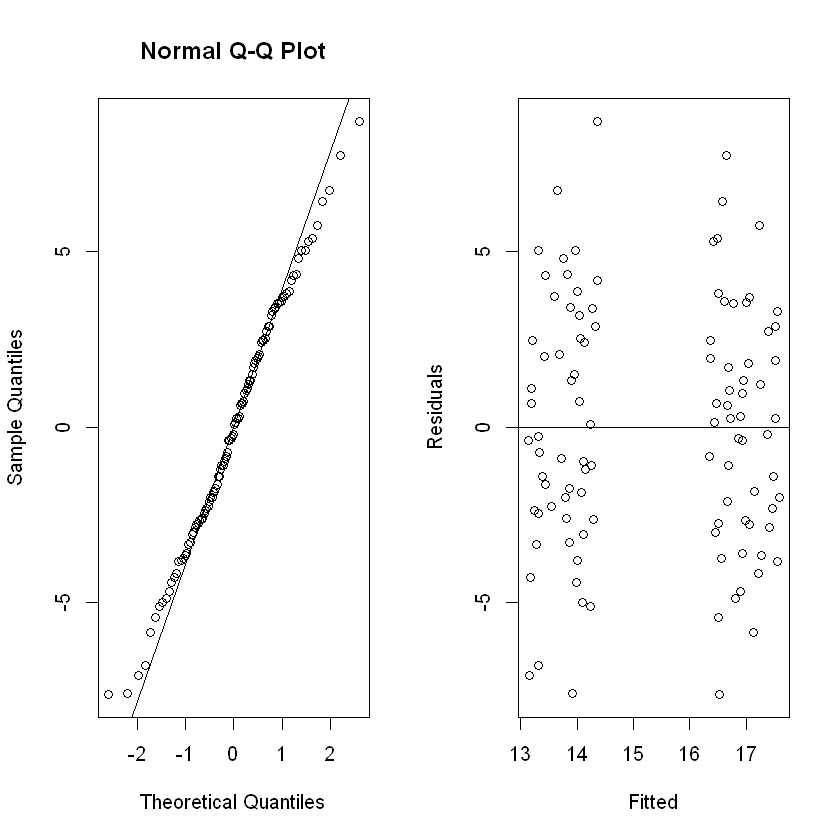

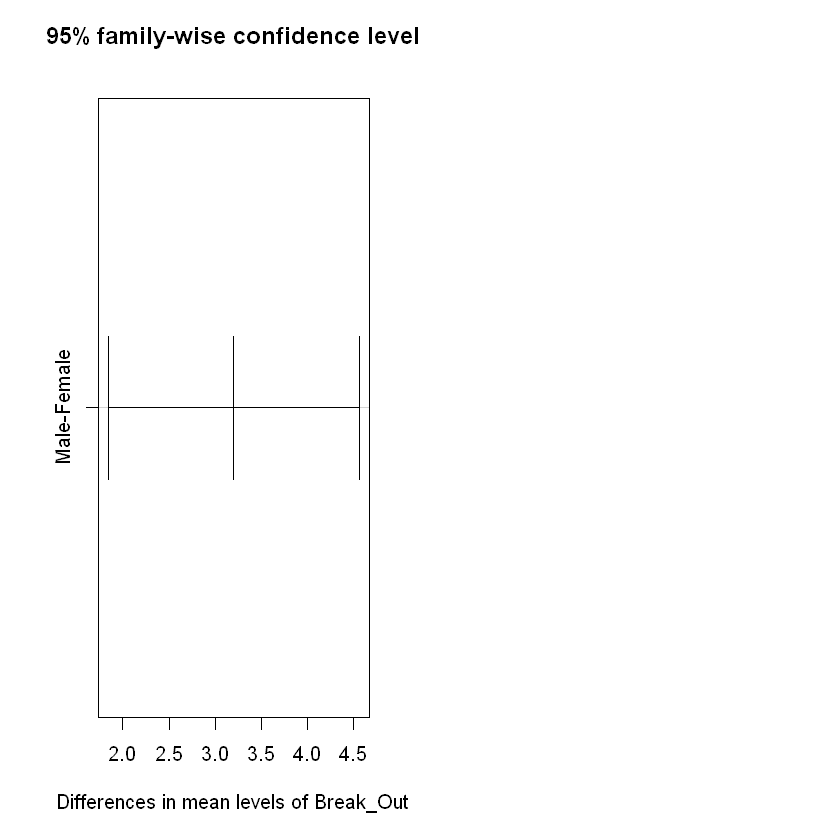

In [61]:
data = read.csv("C:/Users/Jun/Desktop/Courses/Datathon/isCurrent2020Gender.csv")
#data = read.csv("C:/Users/Jun/Desktop/Courses/Datathon/isCurrent2019Gender.csv")
#data = read.csv("C:/Users/Jun/Desktop/Courses/Datathon/isCurrent2018Gender.csv")
data$Break_Out=factor(data$Break_Out)
par(mfrow=c(1,2))
plot(Data_value~Break_Out,data,xlab="Gender",ylab="Percentage of Current Smoker")
stripchart(Data_value~Break_Out,data,vertical=TRUE,method="stack",xlab="Gender",ylab="Percentage of Current Smoker")
print("----------ANOVA with intercept----------")
print("if P(>F)<0.05, there is indeed a difference in the levels.")
lm = lm(Data_value~Break_Out,data)
#summary(lm)
anova(lm)
print("----------Fited model without intercept----------")
lmodi = lm(Data_value~Break_Out-1,data)
summary(lmodi)
#print("----------Fited model without intercept ANOVA----------")
#lmnull=lm(Data_value~1,data)
#anova(lmnull,lmodi)
qqnorm(residuals(lm))
qqline(residuals(lm))
plot(jitter(fitted(lm)),residuals(lm),xlab="Fitted",ylab="Residuals")+abline(h=0)
print("----------Levene's Test----------")
print("if P(>F)>0.05, there is no evidence of non-constant variance.")
med = with(data,tapply(Data_value,Break_Out,median))
ar = with(data,abs(Data_value-med[Break_Out]))
anova(lm(ar~Break_Out,data))

print("----------Comparison Test----------")
library(PMCMRplus)
vartest=anova(lm(ar~Break_Out,data))
if(vartest$`Pr(>F)`[1]<0.05){
    print("----------Non-constant Var----------")
    summary(tamhaneT2Test(data$Data_value,data$Break_Out))
}else{
    print("----------Constant Var----------")
    print(tci <- TukeyHSD(aov(Data_value~Break_Out,data)))
    plot(tci)
}

##  2018-2020: Percentage for current smoking people in Income group

[1] "----------ANOVA with intercept----------"
[1] "if P(>F)<0.05, there is indeed a difference in the levels."


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Break_Out,4,11206.404,2801.60088,107.4321,6.794848e-54
Residuals,260,6780.249,26.07788,NA,NA


[1] "----------Fited model without intercept----------"



Call:
lm(formula = Data_value ~ Break_Out - 1, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.1762  -2.7032   0.1615   3.0815  23.9438 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
Break_Out$15,000-$24,999    24.1581     0.7015   34.44   <2e-16 ***
Break_Out$25,000-$34,999    19.6932     0.7015   28.07   <2e-16 ***
Break_Out$35,000-$49,999    16.4425     0.7015   23.44   <2e-16 ***
Break_Out$50,000+           10.4385     0.7015   14.88   <2e-16 ***
Break_OutLess than $15,000  29.4862     0.7015   42.04   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.107 on 260 degrees of freedom
Multiple R-squared:  0.9455,	Adjusted R-squared:  0.9445 
F-statistic: 902.5 on 5 and 260 DF,  p-value: < 2.2e-16


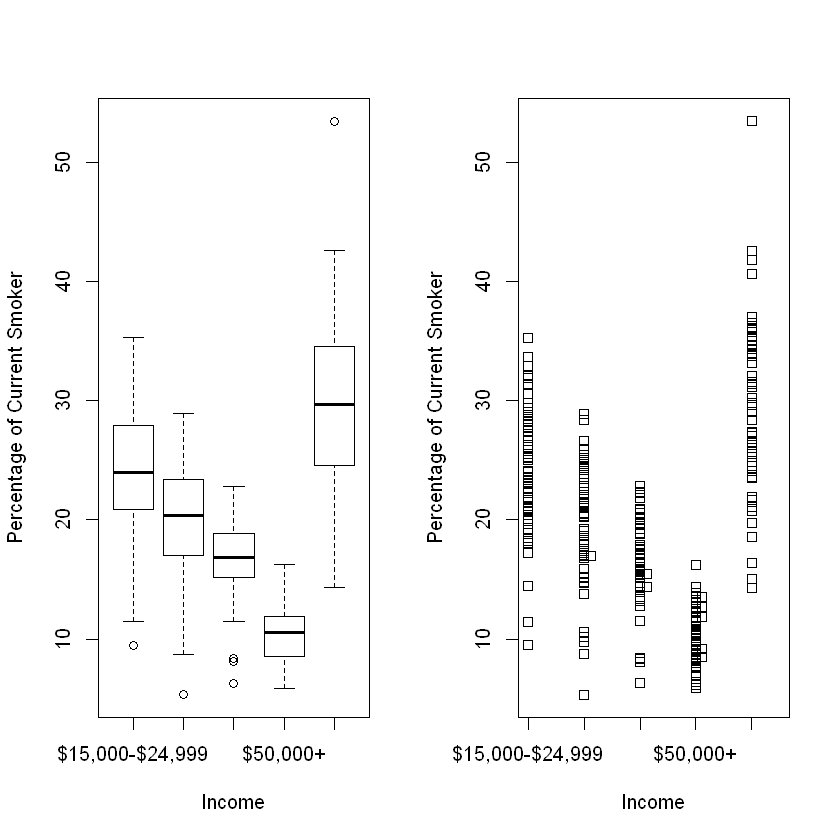

integer(0)

[1] "----------Levene's Test----------"
[1] "if P(>F)<0.05, there is no evidence of non-constant variance."


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Break_Out,4,528.6865,132.171619,13.58365,4.52989e-10
Residuals,260,2529.8519,9.730199,NA,NA


[1] "----------Transformation----------"


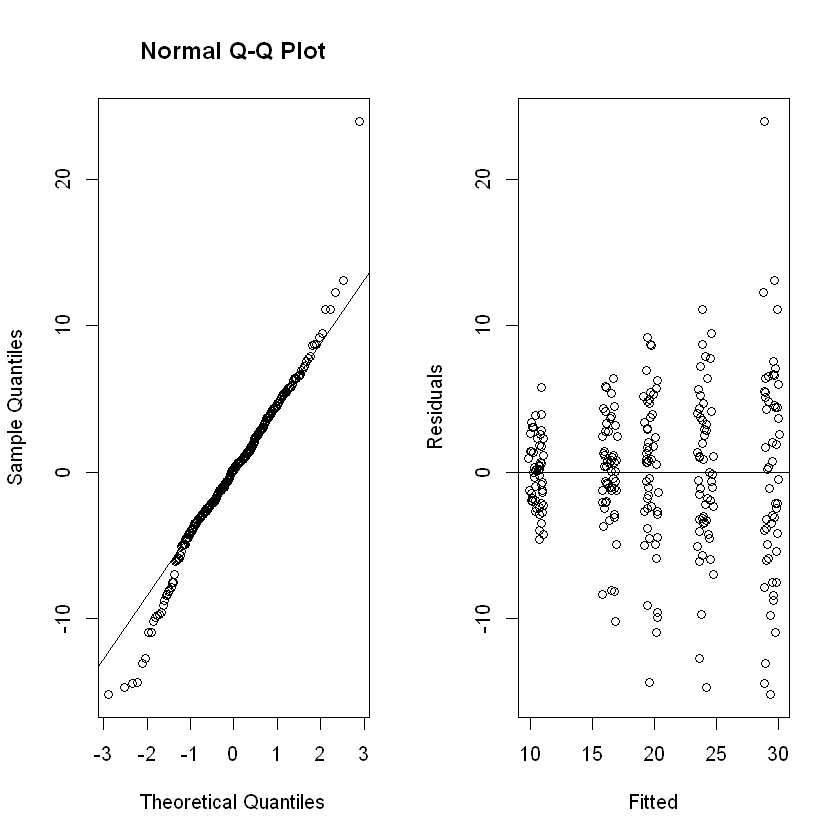

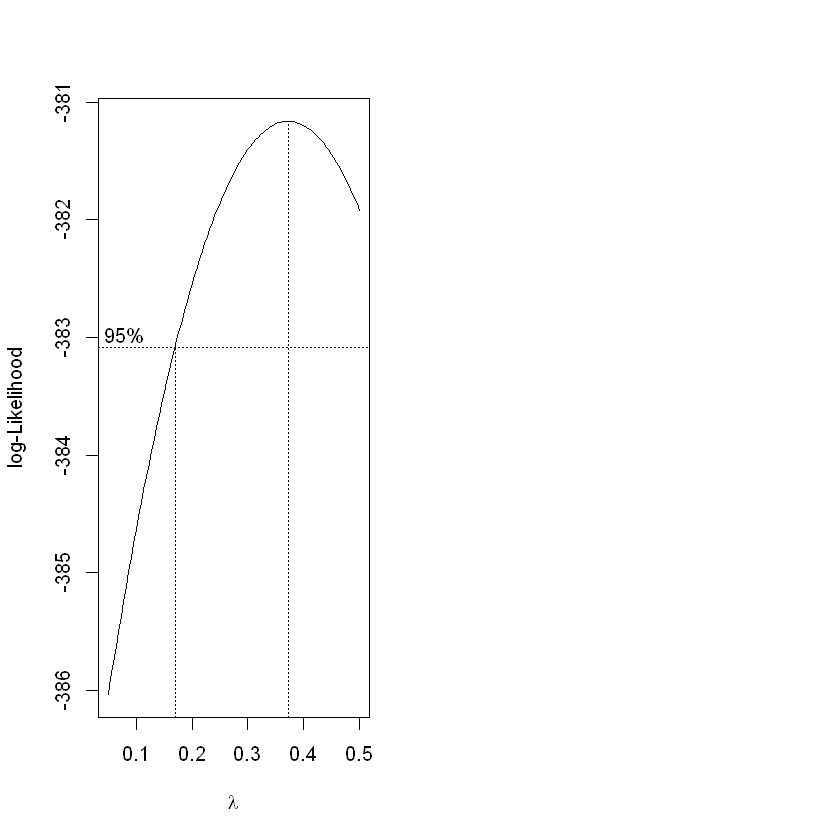

[1] "----------Levene's Test with Transformation----------"
[1] "if P(>F)>0.05, there is no evidence of non-constant variance."


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Break_Out,4,0.3377602,0.08444004,1.710478,0.1480206
Residuals,260,12.8352463,0.04936633,NA,NA


[1] "----------Comparison Test----------"
[1] "----------Non-constant Var----------"



	Pairwise comparisons using Tamhane's T2-test for unequal variances

data: log(data$Data_value) and data$Break_Out
alternative hypothesis: two.sided
P value adjustment method: T2 (Sidak)
H0


                                         t value   Pr(>|t|)    
$25,000-$34,999 - $15,000-$24,999 == 0    -3.919  0.0016459  **
$35,000-$49,999 - $15,000-$24,999 == 0    -7.763 6.0830e-11 ***
$50,000+ - $15,000-$24,999 == 0          -17.859 < 2.22e-16 ***
Less than $15,000 - $15,000-$24,999 == 0   3.864  0.0019453  **
$35,000-$49,999 - $25,000-$34,999 == 0    -2.924  0.0419555   *
$50,000+ - $25,000-$34,999 == 0          -11.338 < 2.22e-16 ***
Less than $15,000 - $25,000-$34,999 == 0   7.215 1.0442e-09 ***
$50,000+ - $35,000-$49,999 == 0           -9.410 1.5543e-14 ***
Less than $15,000 - $35,000-$49,999 == 0  11.334 < 2.22e-16 ***
Less than $15,000 - $50,000+ == 0         21.302 < 2.22e-16 ***


---
Signif. codes: 0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


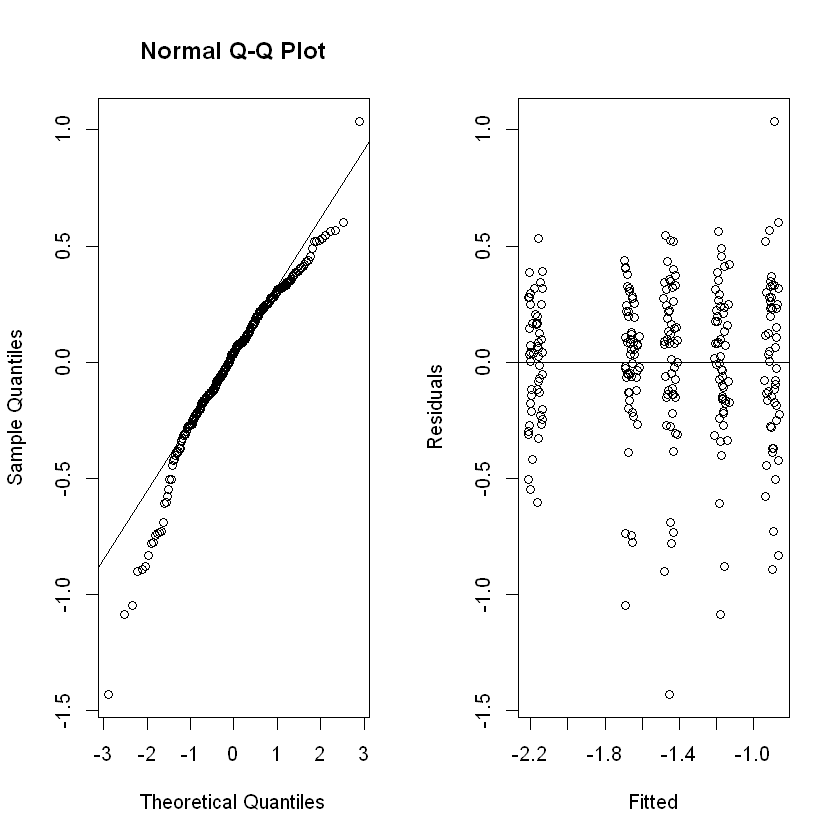

In [46]:
data = read.csv("C:/Users/Jun/Desktop/Courses/Datathon/isCurrent2020Income.csv")
#data = read.csv("C:/Users/Jun/Desktop/Courses/Datathon/isCurrent2019Income.csv")
#data = read.csv("C:/Users/Jun/Desktop/Courses/Datathon/isCurrent2018Income.csv")
data$Break_Out=factor(data$Break_Out)
par(mfrow=c(1,2))
plot(Data_value~Break_Out,data,xlab="Income",ylab="Percentage of Current Smoker")
stripchart(Data_value~Break_Out,data,vertical=TRUE,method="stack",xlab="Income",ylab="Percentage of Current Smoker")
print("----------ANOVA with intercept----------")
print("if P(>F)<0.05, there is indeed a difference in the levels.")
lm = lm(Data_value~Break_Out,data)
#summary(lm)
anova(lm)
print("----------Fited model without intercept----------")
lmodi = lm(Data_value~Break_Out-1,data)
summary(lmodi)
#print("----------Fited model without intercept ANOVA----------")
#lmnull=lm(Data_value~1,data)
#anova(lmnull,lmodi)
qqnorm(residuals(lm))
qqline(residuals(lm))
plot(jitter(fitted(lm)),residuals(lm),xlab="Fitted",ylab="Residuals")+abline(h=0)
print("----------Levene's Test----------")
print("if P(>F)<0.05, there is no evidence of non-constant variance.")
med = with(data,tapply(Data_value,Break_Out,median))
ar = with(data,abs(Data_value-med[Break_Out]))
anova(lm(ar~Break_Out,data))
if(vartest$`Pr(>F)`[1]<0.05){
    print("----------Transformation----------")
    require(MASS)
    boxcox(lm,plotit=T,lambda=seq(0.05,0.5,by=0.01))
    lmtr = lm((log(Data_value/(100-Data_value)))~Break_Out,data)
    summary(lmtr)
    par(mfrow=c(1,2))
    qqnorm(residuals(lmtr))
    qqline(residuals(lmtr))
    plot(jitter(fitted(lmtr)),residuals(lmtr),xlab="Fitted",ylab="Residuals")+abline(h=0)
    print("----------Levene's Test with Transformation----------")
    print("if P(>F)>0.05, there is no evidence of non-constant variance.")
    medtr = with(data,tapply((log(Data_value/(100-Data_value))),Break_Out,median))
    artr = with(data,abs((log(Data_value/(100-Data_value)))-medtr[Break_Out]))
    anova(lm(artr~Break_Out,data))
}
print("----------Comparison Test----------")
library(PMCMRplus)
vartest=anova(lm(ar~Break_Out,data))
if(vartest$`Pr(>F)`[1]<0.05){
    print("----------Non-constant Var----------")
    summary(tamhaneT2Test(data$Data_value,data$Break_Out))
}else{
    print("----------Constant Var----------")
    print(tci <- TukeyHSD(aov(Data_value~Break_Out,data)))
    plot(tci)
}

# 2018-2020: Percentage for current smoking people in Edu group

[1] "----------ANOVA with intercept----------"
[1] "if P(>F)<0.05, there is indeed a difference in the levels."


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Break_Out,3,14590.401,4863.4670,205.6739,5.838954e-62
Residuals,208,4918.471,23.6465,NA,NA


[1] "----------Fited model without intercept----------"



Call:
lm(formula = Data_value ~ Break_Out - 1, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-17.9385  -1.9472   0.0399   2.1757  16.9215 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
Break_OutCollege graduate    6.018      0.668    9.01   <2e-16 ***
Break_OutH.S. or G.E.D.     19.957      0.668   29.88   <2e-16 ***
Break_OutLess than H.S.     28.968      0.668   43.37   <2e-16 ***
Break_OutSome post-H.S.     15.072      0.668   22.57   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.863 on 208 degrees of freedom
Multiple R-squared:  0.9418,	Adjusted R-squared:  0.9406 
F-statistic:   841 on 4 and 208 DF,  p-value: < 2.2e-16


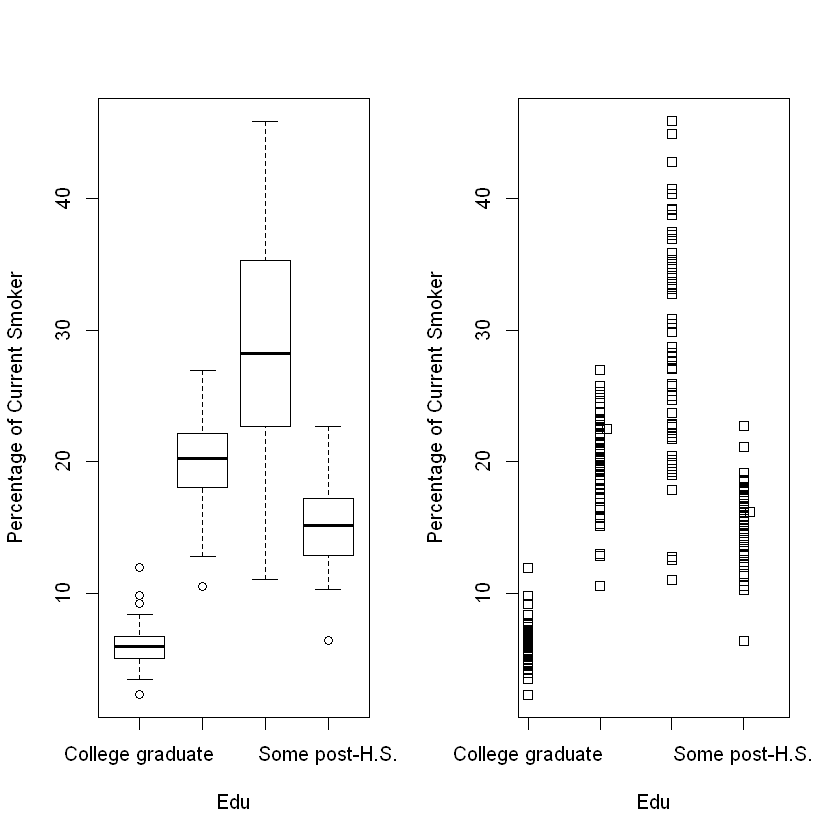

integer(0)

[1] "----------Levene's Test----------"
[1] "if P(>F)>0.05, there is no evidence of non-constant variance."


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Break_Out,3,1070.242,356.747370,47.99131,1.296796e-23
Residuals,208,1546.185,7.433582,NA,NA


[1] "----------Transformation----------"


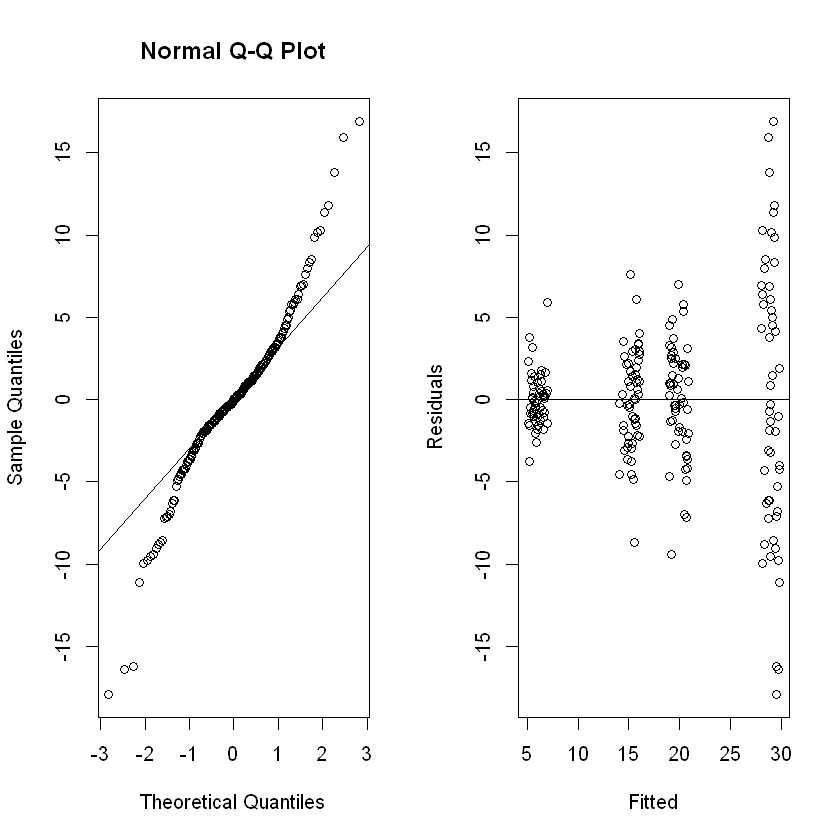

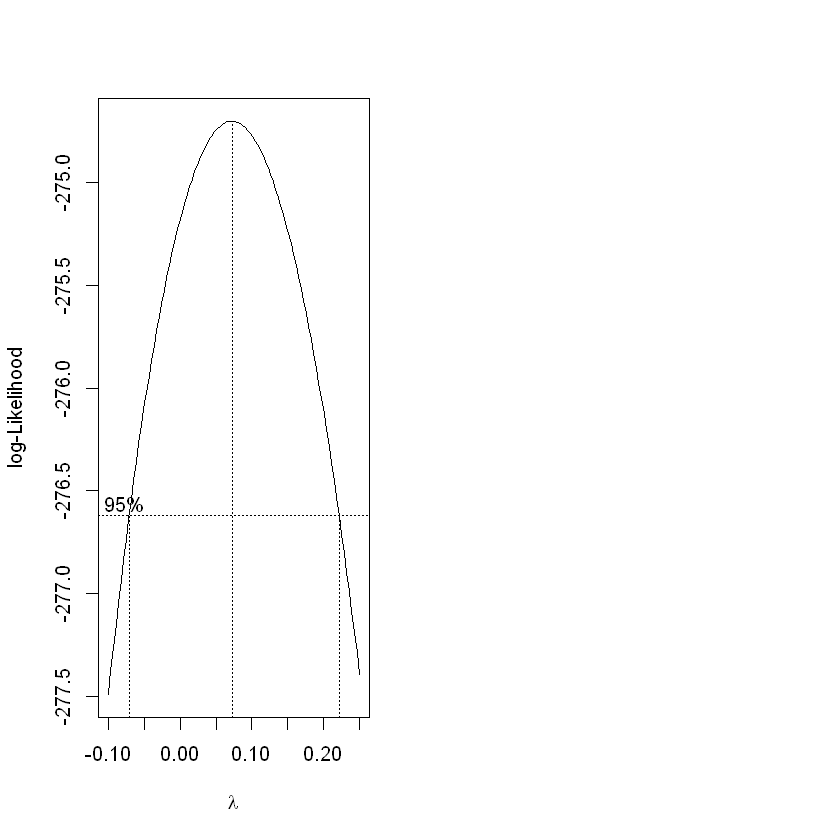

[1] "----------Levene's Test with Transformation----------"
[1] "If P(>F)>0.05, there is no evidence of non-constant variance."


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Break_Out,3,0.4443584,0.1481195,5.625737,0.001000065
Residuals,208,5.4764111,0.0263289,NA,NA


[1] "----------Comparison Test----------"
[1] "----------Non-constant Var----------"



	Pairwise comparisons using Tamhane's T2-test for unequal variances

data: data$Data_value and data$Break_Out
alternative hypothesis: two.sided
P value adjustment method: T2 (Sidak)
H0


                                       t value   Pr(>|t|)    
H.S. or G.E.D. - College graduate == 0  26.973 < 2.22e-16 ***
Less than H.S. - College graduate == 0  19.391 < 2.22e-16 ***
Some post-H.S. - College graduate == 0  19.510 < 2.22e-16 ***
Less than H.S. - H.S. or G.E.D. == 0     7.194 3.7193e-09 ***
Some post-H.S. - H.S. or G.E.D. == 0    -7.885 2.1599e-11 ***
Some post-H.S. - Less than H.S. == 0   -11.280 6.6613e-16 ***


---
Signif. codes: 0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


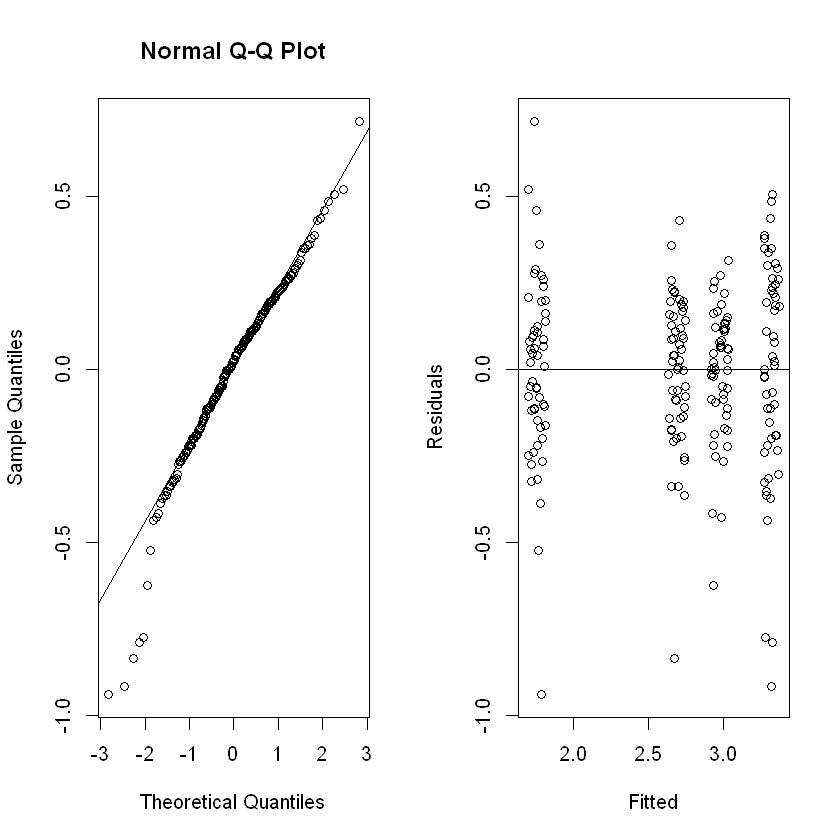

In [60]:
data = read.csv("C:/Users/Jun/Desktop/Courses/Datathon/isCurrent2020Edu.csv")
#data = read.csv("C:/Users/Jun/Desktop/Courses/Datathon/isCurrent2019Edu.csv")
#data = read.csv("C:/Users/Jun/Desktop/Courses/Datathon/isCurrent2018Edu.csv")
data$Break_Out=factor(data$Break_Out)
par(mfrow=c(1,2))
plot(Data_value~Break_Out,data,xlab="Edu",ylab="Percentage of Current Smoker")
stripchart(Data_value~Break_Out,data,vertical=TRUE,method="stack",xlab="Edu",ylab="Percentage of Current Smoker")
print("----------ANOVA with intercept----------")
print("if P(>F)<0.05, there is indeed a difference in the levels.")
lm = lm(Data_value~Break_Out,data)
#summary(lm)
anova(lm)
print("----------Fited model without intercept----------")
lmodi = lm(Data_value~Break_Out-1,data)
summary(lmodi)
#print("----------Fited model without intercept ANOVA----------")
#lmnull=lm(Data_value~1,data)
#anova(lmnull,lmodi)
qqnorm(residuals(lm))
qqline(residuals(lm))
plot(jitter(fitted(lm)),residuals(lm),xlab="Fitted",ylab="Residuals")+abline(h=0)
print("----------Levene's Test----------")
print("if P(>F)>0.05, there is no evidence of non-constant variance.")
med = with(data,tapply(Data_value,Break_Out,median))
ar = with(data,abs(Data_value-med[Break_Out]))
anova(lm(ar~Break_Out,data))
if(vartest$`Pr(>F)`[1]<0.05){
    print("----------Transformation----------")
    require(MASS)
    boxcox(lm,plotit=T,lambda=seq(-0.1,0.25,by=0.01))
    lmtr = lm((log(Data_value))~Break_Out,data)
    summary(lmtr)
    par(mfrow=c(1,2))
    qqnorm(residuals(lmtr))
    qqline(residuals(lmtr))
    plot(jitter(fitted(lmtr)),residuals(lmtr),xlab="Fitted",ylab="Residuals")+abline(h=0)
    print("----------Levene's Test with Transformation----------")
    print("If P(>F)>0.05, there is no evidence of non-constant variance.")
    medtr = with(data,tapply((log(Data_value)),Break_Out,median))
    artr = with(data,abs((log(Data_value))-medtr[Break_Out]))
    anova(lm(artr~Break_Out,data))
}
print("----------Comparison Test----------")
library(PMCMRplus)
vartest=anova(lm(ar~Break_Out,data))
if(vartest$`Pr(>F)`[1]<0.05){
    print("----------Non-constant Var----------")
    summary(tamhaneT2Test(data$Data_value,data$Break_Out))
}else{
    print("----------Constant Var----------")
    print(tci <- TukeyHSD(aov(Data_value~Break_Out,data)))
    plot(tci)
}

# Four Level Smoker Status

## 1. Former smoker siginicantly different?

QQ plot不是正态分布
方差检验不过关


Call:
lm(formula = Data_value ~ Year, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.4770  -0.9723   0.2505   1.5799   7.4530 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 24.887273   0.390397  63.749   <2e-16 ***
Year2012    -0.003636   0.552105  -0.007    0.995    
Year2013     0.170909   0.552105   0.310    0.757    
Year2014    -0.123636   0.552105  -0.224    0.823    
Year2015    -0.039273   0.552105  -0.071    0.943    
Year2016    -0.320308   0.549635  -0.583    0.560    
Year2017    -0.270545   0.552105  -0.490    0.624    
Year2018    -0.228000   0.552105  -0.413    0.680    
Year2019    -0.259125   0.554655  -0.467    0.641    
Year2020    -0.416182   0.552105  -0.754    0.451    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.895 on 540 degrees of freedom
Multiple R-squared:  0.003542,	Adjusted R-squared:  -0.01307 
F-statistic: 0.2133 on 9 and 540 DF,  p-value: 0

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Year,9,16.08993,1.787770,0.213273,0.9925492
Residuals,540,4526.57285,8.382542,NA,NA


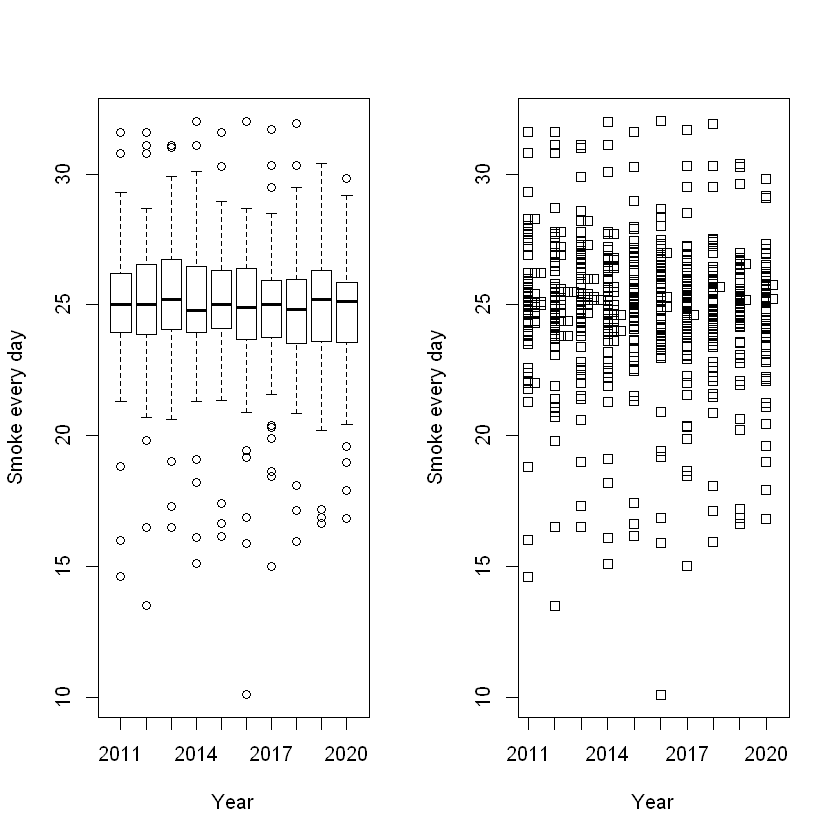

integer(0)

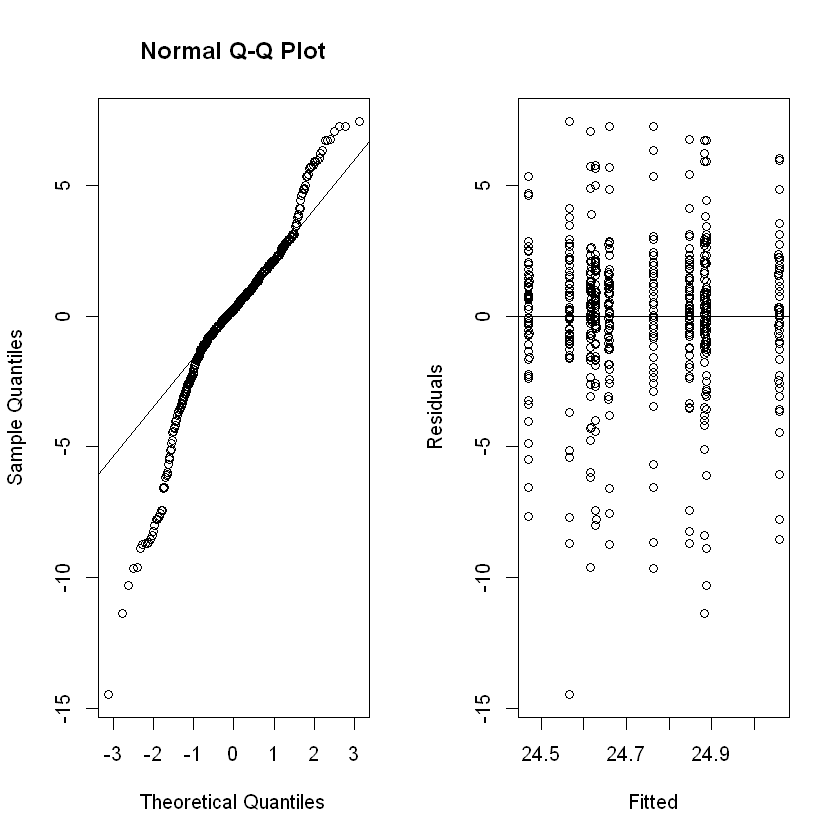

In [64]:
#data = read.csv("C:/Users/Jun/Desktop/Courses/Datathon/LevelonYear.csv")
data = read.csv("C:/Users/Jun/Desktop/Courses/Datathon/FormeronYear.csv")
data$Year=factor(data$Year)
par(mfrow=c(1,2))
plot(Data_value~Year,data,xlab="Year",ylab="Smoke every day")
stripchart(Data_value~Year,data,vertical=TRUE,method="stack",xlab="Year",ylab="Smoke every day")

lm = lm(Data_value~Year,data)
summary(lm)

anova(lm)
par(mfrow=c(1,2))
qqnorm(residuals(lm))
qqline(residuals(lm))
plot(jitter(fitted(lm)),residuals(lm),xlab="Fitted",ylab="Residuals")+abline(h=0)



[1] "----------ANOVA with intercept----------"
[1] "if P(>F)<0.05, there is indeed a difference in the levels."


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Year,9,16.08993,1.787770,0.213273,0.9925492
Residuals,540,4526.57285,8.382542,NA,NA


[1] "----------Fited model without intercept----------"



Call:
lm(formula = Data_value ~ Year - 1, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.4770  -0.9723   0.2505   1.5799   7.4530 

Coefficients:
         Estimate Std. Error t value Pr(>|t|)    
Year2011  24.8873     0.3904   63.75   <2e-16 ***
Year2012  24.8836     0.3904   63.74   <2e-16 ***
Year2013  25.0582     0.3904   64.19   <2e-16 ***
Year2014  24.7636     0.3904   63.43   <2e-16 ***
Year2015  24.8480     0.3904   63.65   <2e-16 ***
Year2016  24.5670     0.3869   63.50   <2e-16 ***
Year2017  24.6167     0.3904   63.06   <2e-16 ***
Year2018  24.6593     0.3904   63.16   <2e-16 ***
Year2019  24.6281     0.3940   62.51   <2e-16 ***
Year2020  24.4711     0.3904   62.68   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.895 on 540 degrees of freedom
Multiple R-squared:  0.9867,	Adjusted R-squared:  0.9865 
F-statistic:  4016 on 10 and 540 DF,  p-value: < 2.2e-16


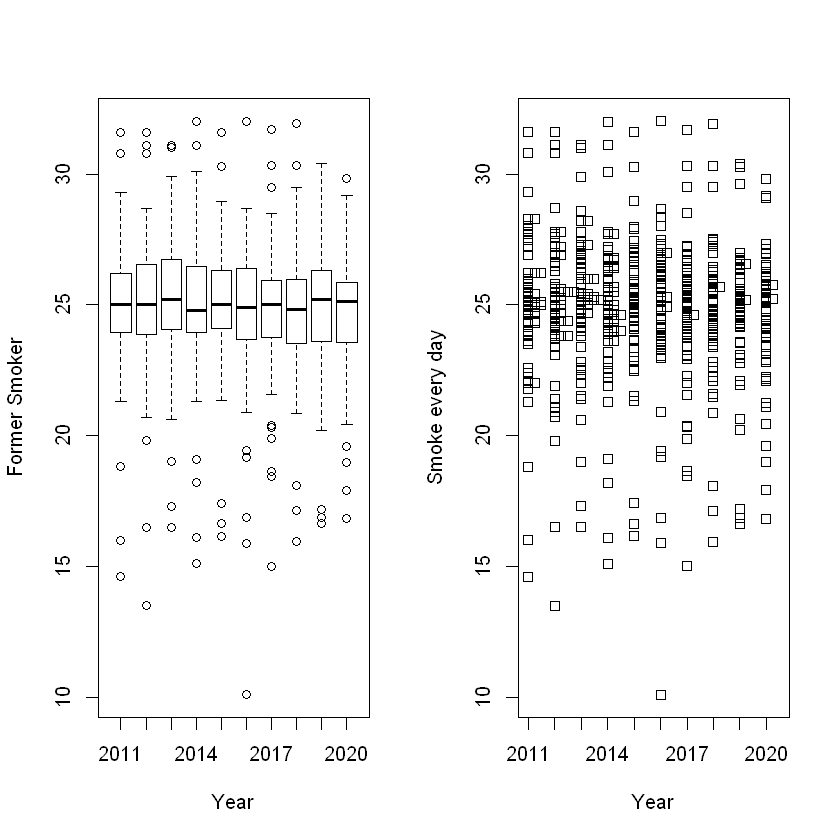

integer(0)

[1] "----------Levene's Test----------"
[1] "if P(>F)>0.05, there is no evidence of non-constant variance."


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Year,9,4.581591,0.5090656,0.1095049,0.9994579
Residuals,540,2510.349378,4.6487951,NA,NA


[1] "----------Transformation----------"
[1] "----------For not Normal distrbution----------"



Call:
lm(formula = (log(Data_value/(100 - Data_value))) ~ Year, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.05458 -0.04531  0.02098  0.08980  0.37983 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.1117357  0.0225045 -49.401   <2e-16 ***
Year2012    -0.0008333  0.0318261  -0.026    0.979    
Year2013     0.0100696  0.0318261   0.316    0.752    
Year2014    -0.0068182  0.0318261  -0.214    0.830    
Year2015    -0.0012165  0.0318261  -0.038    0.970    
Year2016    -0.0209503  0.0316837  -0.661    0.509    
Year2017    -0.0138486  0.0318261  -0.435    0.664    
Year2018    -0.0111985  0.0318261  -0.352    0.725    
Year2019    -0.0128417  0.0319732  -0.402    0.688    
Year2020    -0.0205585  0.0318261  -0.646    0.519    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1669 on 540 degrees of freedom
Multiple R-squared:  0.003225,	Adjusted R-squared:  -0.01339 
F-statisti

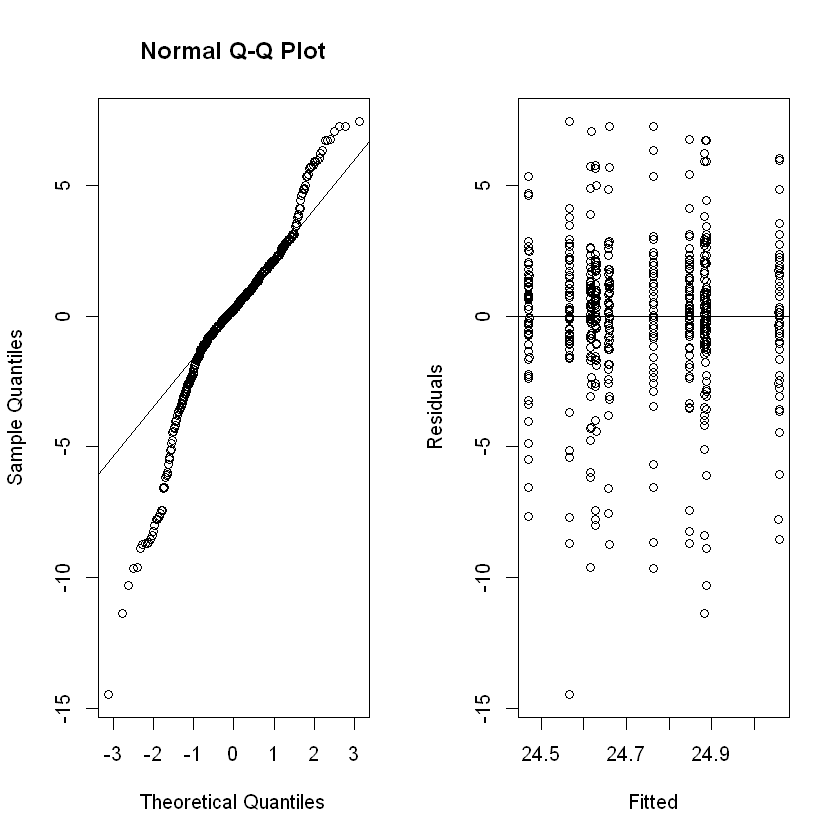

integer(0)

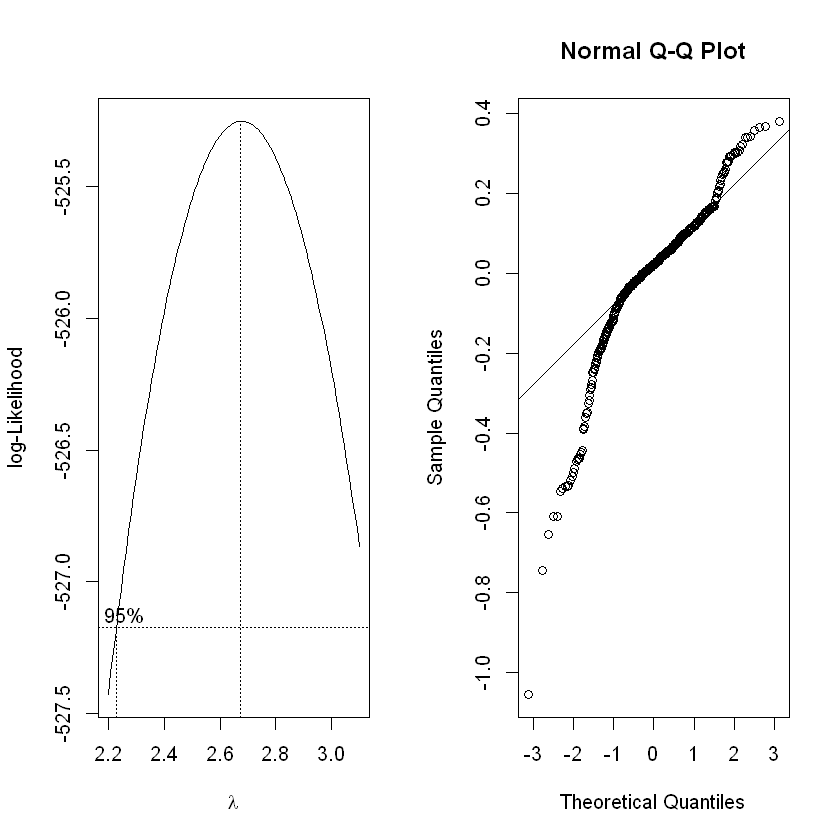

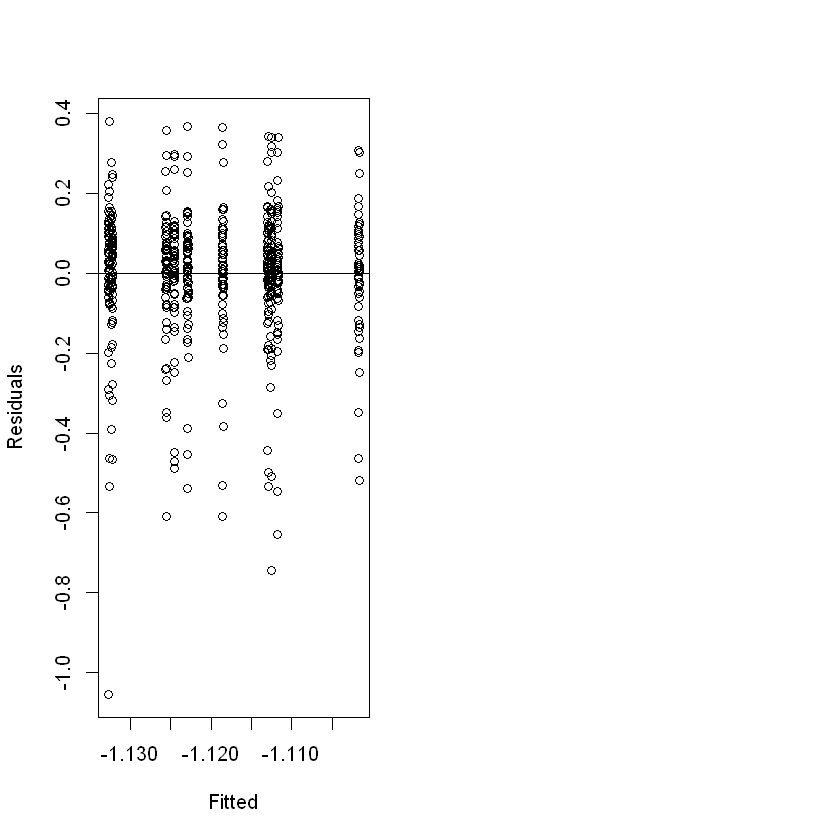

integer(0)

[1] "----------Levene's Test with Transformation----------"
[1] "If P(>F)>0.05, there is no evidence of non-constant variance."


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Year,9,0.00309318,0.0003436867,0.1144662,0.9993503
Residuals,540,1.62135950,0.0030025176,NA,NA


[1] "----------Comparison Test----------"
[1] "----------Constant Var----------"
  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Data_value ~ Year, data = data)

$Year
                  diff       lwr      upr     p adj
2012-2011 -0.003636364 -1.757686 1.750413 1.0000000
2013-2011  0.170909091 -1.583140 1.924958 0.9999995
2014-2011 -0.123636364 -1.877686 1.630413 1.0000000
2015-2011 -0.039272727 -1.793322 1.714777 1.0000000
2016-2011 -0.320308442 -2.066510 1.425893 0.9998925
2017-2011 -0.270545455 -2.024595 1.483504 0.9999753
2018-2011 -0.228000000 -1.982049 1.526049 0.9999944
2019-2011 -0.259124579 -2.021276 1.503027 0.9999836
2020-2011 -0.416181818 -2.170231 1.337867 0.9991100
2013-2012  0.174545455 -1.579504 1.928595 0.9999995
2014-2012 -0.120000000 -1.874049 1.634049 1.0000000
2015-2012 -0.035636364 -1.789686 1.718413 1.0000000
2016-2012 -0.316672078 -2.062873 1.429529 0.9999023
2017-2012 -0.266909091 -2.020958 1.487140 0.9999780
2018-

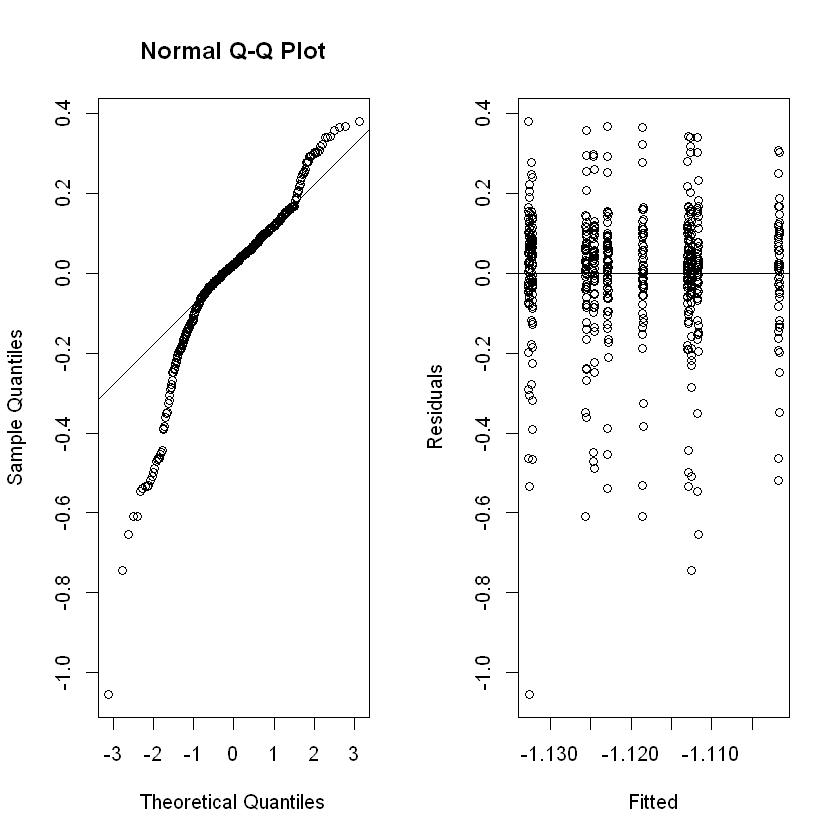

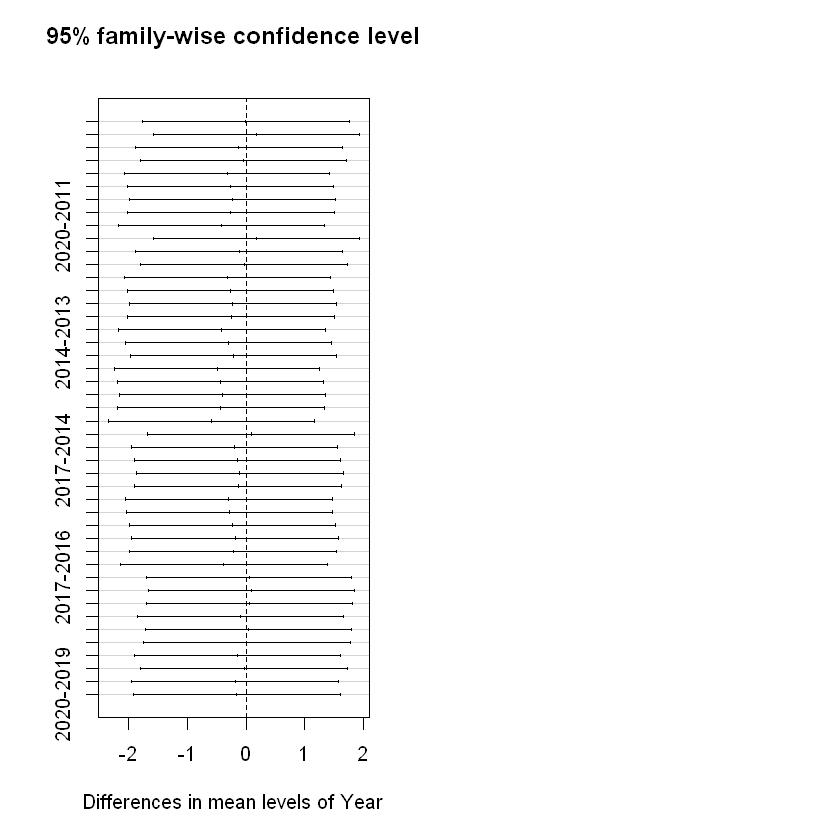

In [91]:
data = read.csv("C:/Users/Jun/Desktop/Courses/Datathon/FormeronYear.csv")
data$Year=factor(data$Year)
par(mfrow=c(1,2))
plot(Data_value~Year,data,xlab="Year",ylab="Former Smoker")
stripchart(Data_value~Year,data,vertical=TRUE,method="stack",xlab="Year",ylab="Smoke every day")
print("----------ANOVA with intercept----------")
print("if P(>F)<0.05, there is indeed a difference in the levels.")
lm = lm(Data_value~Year,data)
#summary(lm)
anova(lm)
print("----------Fited model without intercept----------")
lmodi = lm(Data_value~Year-1,data)
summary(lmodi)
#print("----------Fited model without intercept ANOVA----------")
#lmnull=lm(Data_value~1,data)
#anova(lmnull,lmodi)
qqnorm(residuals(lm))
qqline(residuals(lm))
plot(jitter(fitted(lm)),residuals(lm),xlab="Fitted",ylab="Residuals")+abline(h=0)
print("----------Levene's Test----------")
print("if P(>F)>0.05, there is no evidence of non-constant variance.")
med = with(data,tapply(Data_value,Year,median))
ar = with(data,abs(Data_value-med[Year]))
anova(lm(ar~Year,data))

print("----------Transformation----------")
print("----------For not Normal distrbution----------")
require(MASS)
boxcox(lm,plotit=T,lambda=seq(2.2,3.1,by=0.1))
lmtr = lm((log(Data_value/(100-Data_value)))~Year,data)
summary(lmtr)
qqnorm(residuals(lmtr))
qqline(residuals(lmtr))
plot(jitter(fitted(lmtr)),residuals(lmtr),xlab="Fitted",ylab="Residuals")+abline(h=0)
par(mfrow=c(1,2))
qqnorm(residuals(lmtr))
qqline(residuals(lmtr))
plot(jitter(fitted(lmtr)),residuals(lmtr),xlab="Fitted",ylab="Residuals")+abline(h=0)
print("----------Levene's Test with Transformation----------")
print("If P(>F)>0.05, there is no evidence of non-constant variance.")
medtr = with(data,tapply((0.4*(Data_value^(0.4)-1)),Year,median))
artr = with(data,abs((0.4*(Data_value^(0.4)-1))-medtr[Year]))
anova(lm(artr~Year,data))


print("----------Comparison Test----------")
library(PMCMRplus)
vartest=anova(lm(ar~Year,data))
if(vartest$`Pr(>F)`[1]<0.05){
    print("----------Non-constant Var----------")
    summary(tamhaneT2Test(data$Data_value,data$Year))
}else{
    print("----------Constant Var----------")
    print(tci <- TukeyHSD(aov(Data_value~Year,data)))
    plot(tci)
}

In [81]:
data = read.csv("C:/Users/Jun/Desktop/Courses/Datathon/Formeron1920.csv")
wilcox.test(data$Data_value~data$Year)


	Wilcoxon rank sum test with continuity correction

data:  data$Data_value by data$Year
W = 1553, p-value = 0.6825
alternative hypothesis: true location shift is not equal to 0


In [88]:
data = read.csv("C:/Users/Jun/Desktop/Courses/Datathon/Formeron1720.csv")
wilcox.test(data$Data_value~data$Year)


	Wilcoxon rank sum test with continuity correction

data:  data$Data_value by data$Year
W = 1545.5, p-value = 0.8459
alternative hypothesis: true location shift is not equal to 0


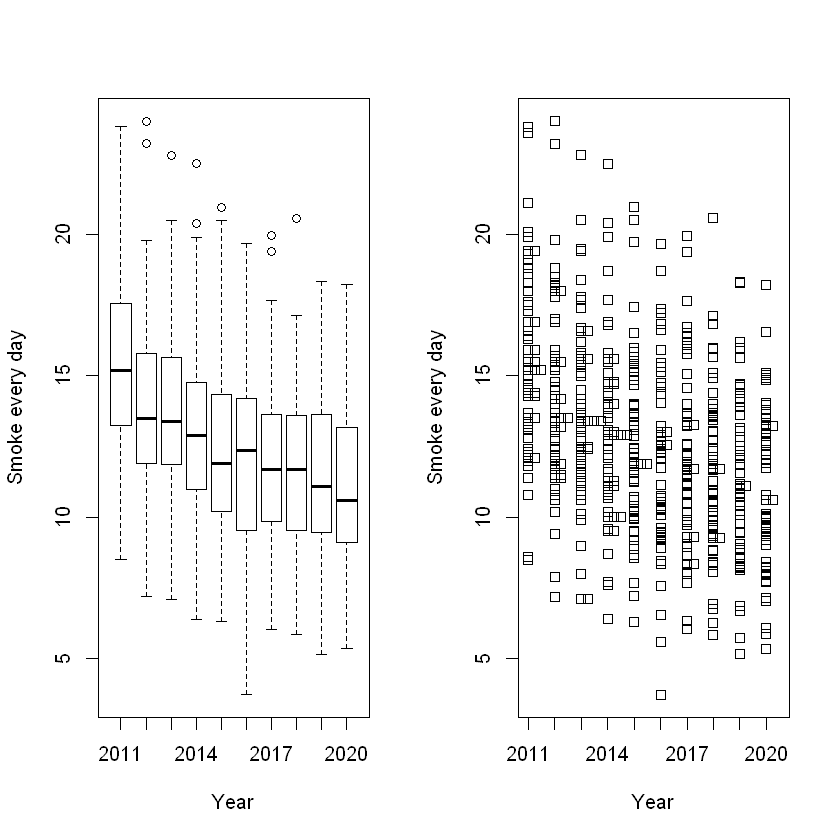

In [90]:
data = read.csv("C:/Users/Jun/Desktop/Courses/Datathon/SmokeEverydayonYear.csv")
data$Year=factor(data$Year)
par(mfrow=c(1,2))
plot(Data_value~Year,data,xlab="Year",ylab="Smoke every day")
stripchart(Data_value~Year,data,vertical=TRUE,method="stack",xlab="Year",ylab="Smoke every day")


In [82]:
data = read.csv("C:/Users/Jun/Desktop/Courses/Datathon/SmokeEverydayon1920.csv")
wilcox.test(data$Data_value~data$Year)


	Wilcoxon rank sum test with continuity correction

data:  data$Data_value by data$Year
W = 1627, p-value = 0.3911
alternative hypothesis: true location shift is not equal to 0


In [89]:
data = read.csv("C:/Users/Jun/Desktop/Courses/Datathon/SmokeEverydayon1720.csv")
wilcox.test(data$Data_value~data$Year)


	Wilcoxon rank sum test with continuity correction

data:  data$Data_value by data$Year
W = 1782.5, p-value = 0.1072
alternative hypothesis: true location shift is not equal to 0


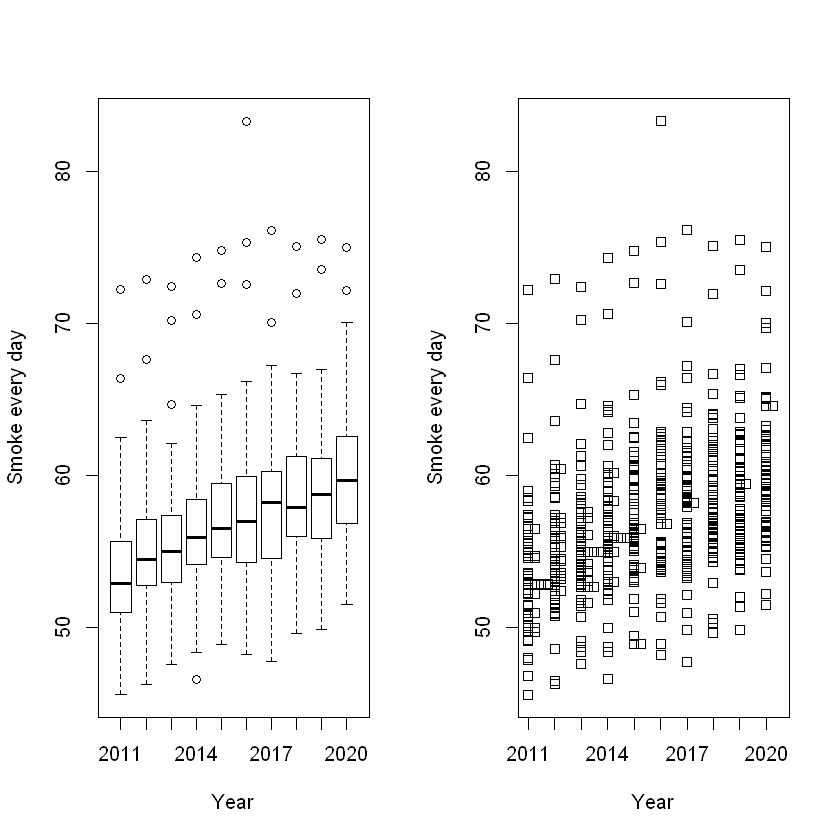

In [84]:
data = read.csv("C:/Users/Jun/Desktop/Courses/Datathon/NeverSmokedonYear.csv")
data$Year=factor(data$Year)
par(mfrow=c(1,2))
plot(Data_value~Year,data,xlab="Year",ylab="NeverSmoked")
stripchart(Data_value~Year,data,vertical=TRUE,method="stack",xlab="Year",ylab="Smoke every day")


In [85]:
data = read.csv("C:/Users/Jun/Desktop/Courses/Datathon/NeverSmokedon1920.csv")
wilcox.test(data$Data_value~data$Year)


	Wilcoxon rank sum test with continuity correction

data:  data$Data_value by data$Year
W = 1266, p-value = 0.1854
alternative hypothesis: true location shift is not equal to 0


In [86]:
data = read.csv("C:/Users/Jun/Desktop/Courses/Datathon/NeverSmokedon1820.csv")
wilcox.test(data$Data_value~data$Year)


	Wilcoxon rank sum test with continuity correction

data:  data$Data_value by data$Year
W = 1223.5, p-value = 0.08458
alternative hypothesis: true location shift is not equal to 0


In [87]:
data = read.csv("C:/Users/Jun/Desktop/Courses/Datathon/NeverSmokedon1720.csv")
wilcox.test(data$Data_value~data$Year)


	Wilcoxon rank sum test with continuity correction

data:  data$Data_value by data$Year
W = 1078.5, p-value = 0.009555
alternative hypothesis: true location shift is not equal to 0


[1] "----------ANOVA with intercept----------"
[1] "if P(>F)<0.05, there is indeed a difference in the levels."


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Break_Out,1,1118.6502,1118.650212,140.3893,5.190719e-21
Residuals,104,828.6929,7.968201,NA,NA


[1] "----------Fited model without intercept----------"



Call:
lm(formula = Data_value ~ Break_Out - 1, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.8111 -0.9540  0.3753  1.5946  6.3489 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
Break_OutFemale  21.2711     0.3877   54.86   <2e-16 ***
Break_OutMale    27.7683     0.3877   71.62   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.823 on 104 degrees of freedom
Multiple R-squared:  0.9874,	Adjusted R-squared:  0.9871 
F-statistic:  4069 on 2 and 104 DF,  p-value: < 2.2e-16


[1] "----------Fited model without intercept ANOVA----------"


Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
105,1947.3431,NA,NA,NA,NA
104,828.6929,1,1118.65,140.3893,5.190719e-21


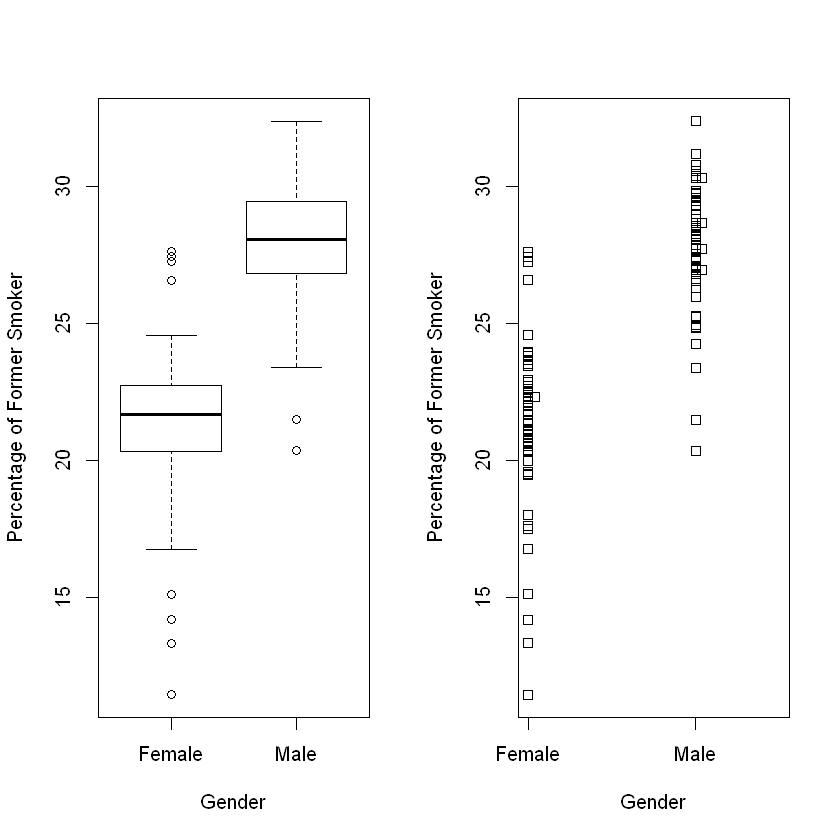

integer(0)

[1] "----------Levene's Test----------"
[1] "if P(>F)>0.05, there is no evidence of non-constant variance."


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Break_Out,1,3.883812,3.883812,0.988051,0.3225263
Residuals,104,408.801242,3.930781,NA,NA


[1] "----------Transformation----------"



Call:
lm(formula = 1/2.25 * (Data_value^(2.25) - 1) ~ Break_Out - 1, 
    data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-403.79  -58.61    5.38   89.43  332.12 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
Break_OutFemale   444.70      19.58   22.72   <2e-16 ***
Break_OutMale     794.27      19.58   40.57   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 142.5 on 104 degrees of freedom
Multiple R-squared:  0.9541,	Adjusted R-squared:  0.9532 
F-statistic:  1081 on 2 and 104 DF,  p-value: < 2.2e-16


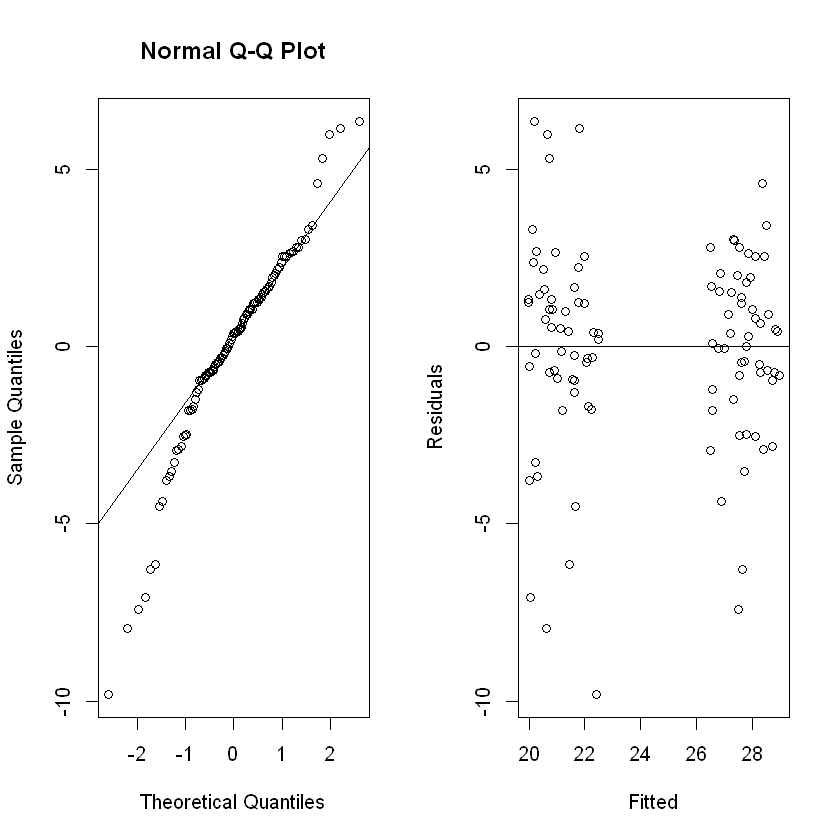

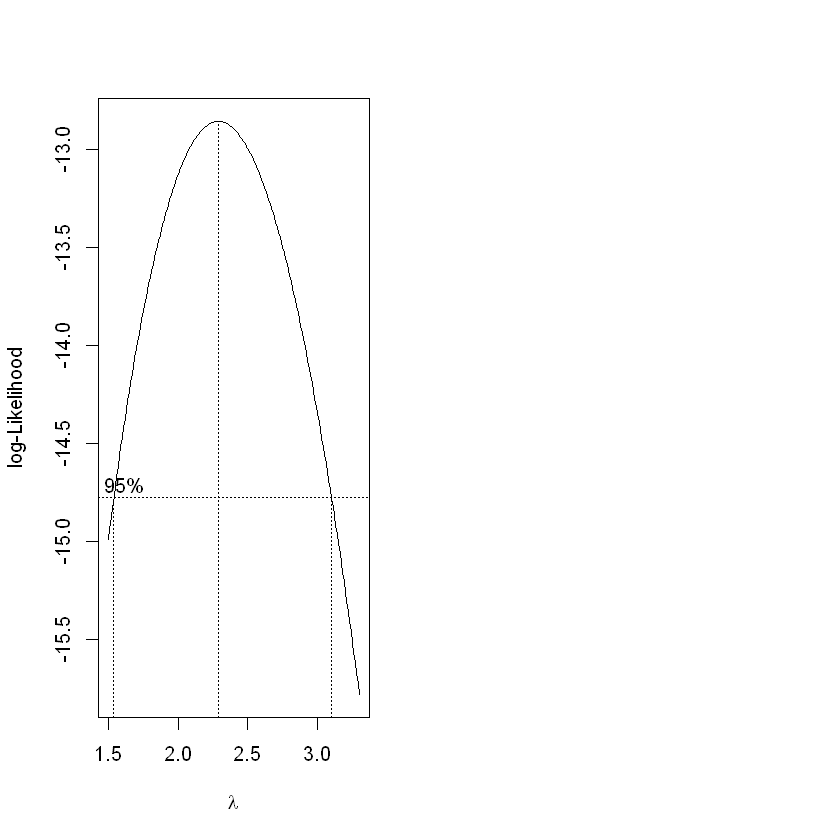

integer(0)

[1] "----------Levene's Test with Transformation----------"
[1] "if P(>F)>0.05, there is no evidence of non-constant variance."


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Break_Out,1,6987.283,6987.283,0.792565,0.3753805
Residuals,104,916867.932,8816.038,NA,NA


[1] "----------Comparison Test----------"
[1] "----------Constant Var----------"
  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Data_value ~ Break_Out, data = data)

$Break_Out
               diff      lwr      upr p adj
Male-Female 6.49717 5.409773 7.584567     0



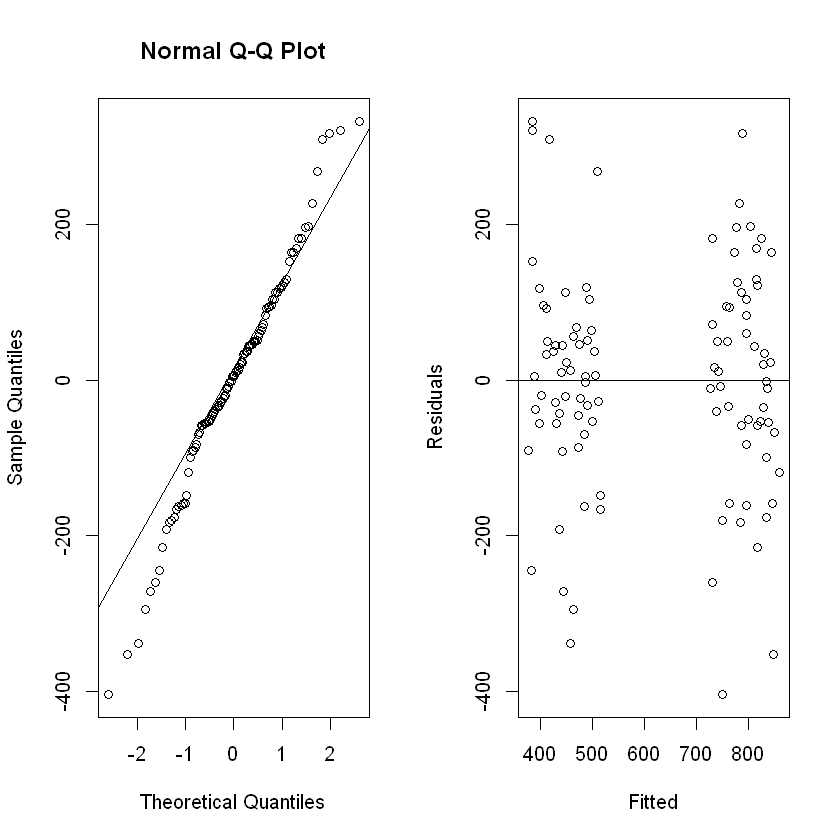

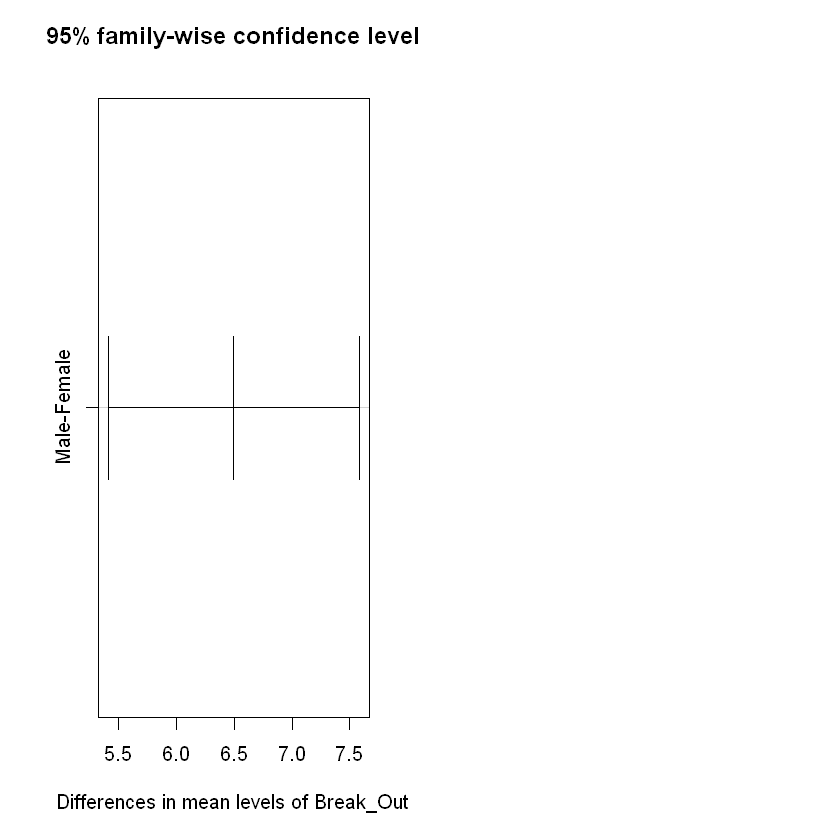

In [101]:
data = read.csv("C:/Users/Jun/Desktop/Courses/Datathon/FormerSmoker20.csv")
#data = read.csv("C:/Users/Jun/Desktop/Courses/Datathon/isCurrent2019Age.csv")
#data = read.csv("C:/Users/Jun/Desktop/Courses/Datathon/isCurrent2018Age.csv")
data$Break_Out=factor(data$Break_Out)
par(mfrow=c(1,2))
plot(Data_value~Break_Out,data,xlab="Gender",ylab="Percentage of Former Smoker")
stripchart(Data_value~Break_Out,data,vertical=TRUE,method="stack",xlab="Gender",ylab="Percentage of Former Smoker")
print("----------ANOVA with intercept----------")
print("if P(>F)<0.05, there is indeed a difference in the levels.")
lm = lm(Data_value~Break_Out,data)
#summary(lm)
anova(lm)
print("----------Fited model without intercept----------")
lmodi = lm(Data_value~Break_Out-1,data)
summary(lmodi)
print("----------Fited model without intercept ANOVA----------")
lmnull=lm(Data_value~1,data)
anova(lmnull,lmodi)
qqnorm(residuals(lm))
qqline(residuals(lm))
plot(jitter(fitted(lm)),residuals(lm),xlab="Fitted",ylab="Residuals")+abline(h=0)
print("----------Levene's Test----------")
print("if P(>F)>0.05, there is no evidence of non-constant variance.")
med = with(data,tapply(Data_value,Break_Out,median))
ar = with(data,abs(Data_value-med[Break_Out]))
anova(lm(ar~Break_Out,data))

print("----------Transformation----------")
require(MASS)
boxcox(lm,plotit=T,lambda=seq(1.5,3.3,by=0.01))
lmtr = lm(1/2.25*(Data_value^(2.25)-1)~Break_Out,data)
summary(lmtr)
par(mfrow=c(1,2))
qqnorm(residuals(lmtr))
qqline(residuals(lmtr))
plot(jitter(fitted(lmtr)),residuals(lmtr),xlab="Fitted",ylab="Residuals")+abline(h=0)
print("----------Levene's Test with Transformation----------")
print("if P(>F)>0.05, there is no evidence of non-constant variance.")
medtr = with(data,tapply(1/2.25*(Data_value^(2.25)-1),Break_Out,median))
artr = with(data,abs(1/2.25*(Data_value^(2.25)-1)-medtr[Break_Out]))
anova(lm(artr~Break_Out,data))

print("----------Comparison Test----------")
library(PMCMRplus)
vartest=anova(lm(ar~Break_Out,data))
if(vartest$`Pr(>F)`[1]<0.05){
    print("----------Non-constant Var----------")
    summary(tamhaneT2Test(data$Data_value,data$Break_Out))
}else{
    print("----------Constant Var----------")
    print(tci <- TukeyHSD(aov(Data_value~Break_Out,data)))
    plot(tci)
}

[1] "----------ANOVA with intercept----------"
[1] "if P(>F)<0.05, there is indeed a difference in the levels."


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Break_Out,5,24851.191,4970.23816,517.012,4.167154e-145
Residuals,300,2884.017,9.61339,NA,NA


[1] "----------Fited model without intercept----------"



Call:
lm(formula = Data_value ~ Break_Out - 1, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.9642  -1.7960   0.1401   1.9142   8.1249 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
Break_Out18-24   7.8066     0.4842   16.12   <2e-16 ***
Break_Out25-34  17.6736     0.4259   41.50   <2e-16 ***
Break_Out35-44  23.0451     0.4259   54.11   <2e-16 ***
Break_Out45-54  22.5772     0.4259   53.01   <2e-16 ***
Break_Out55-64  28.1726     0.4259   66.15   <2e-16 ***
Break_Out65+    38.3842     0.4259   90.13   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.101 on 300 degrees of freedom
Multiple R-squared:  0.9854,	Adjusted R-squared:  0.9851 
F-statistic:  3370 on 6 and 300 DF,  p-value: < 2.2e-16


[1] "----------Fited model without intercept ANOVA----------"


Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
305,27735.208,NA,NA,NA,NA
300,2884.017,5,24851.19,517.012,4.167154e-145


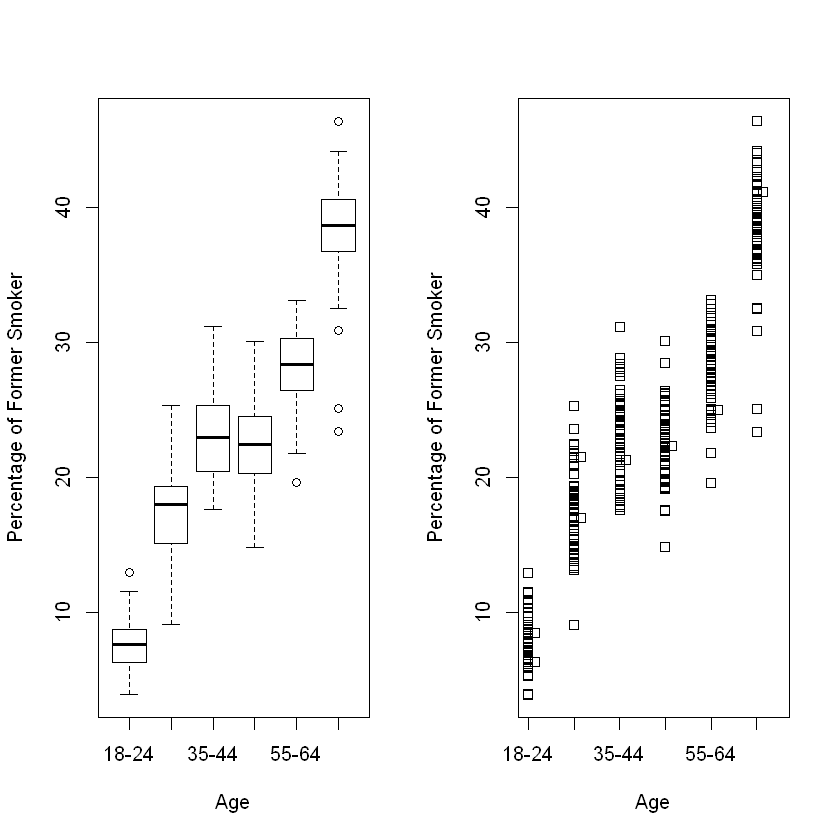

integer(0)

[1] "----------Levene's Test----------"
[1] "if P(>F)>0.05, there is no evidence of non-constant variance."


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Break_Out,5,31.51987,6.303974,1.560206,0.171178
Residuals,300,1212.14236,4.040475,NA,NA


[1] "----------Transformation----------"



Call:
lm(formula = 1/2.25 * (Data_value^(2.25) - 1) ~ Break_Out, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1118.24   -95.75    -3.69    83.80   842.85 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)       49.21      30.27   1.626    0.105    
Break_Out25-34   247.14      40.32   6.130 2.76e-09 ***
Break_Out35-44   481.27      40.32  11.938  < 2e-16 ***
Break_Out45-54   454.91      40.32  11.284  < 2e-16 ***
Break_Out55-64   774.09      40.32  19.201  < 2e-16 ***
Break_Out65+    1604.87      40.32  39.808  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 193.8 on 300 degrees of freedom
Multiple R-squared:  0.8741,	Adjusted R-squared:  0.872 
F-statistic: 416.6 on 5 and 300 DF,  p-value: < 2.2e-16


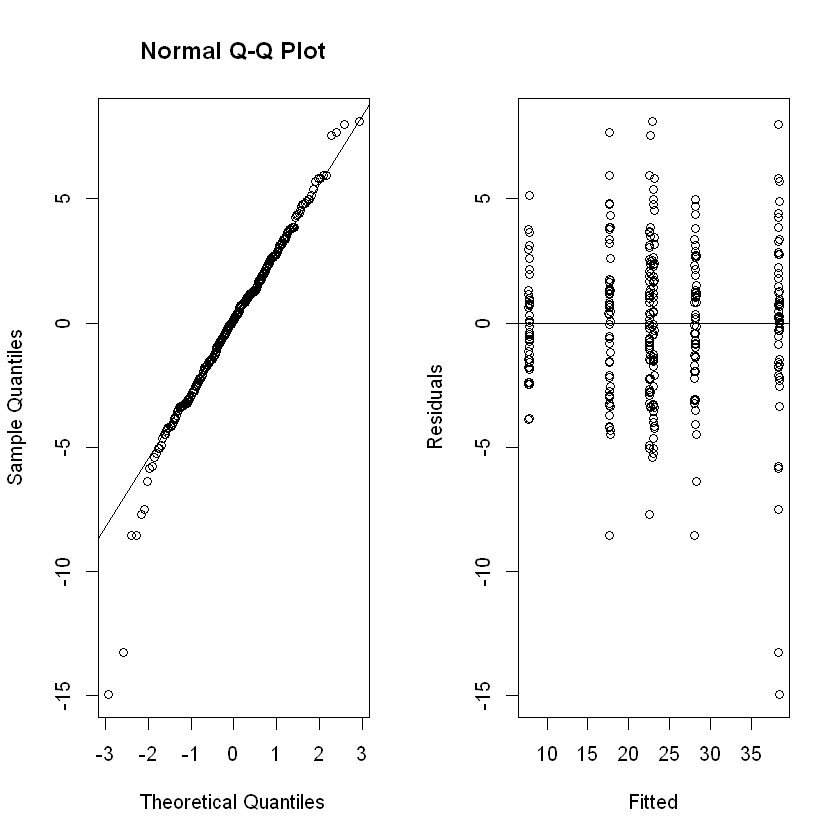

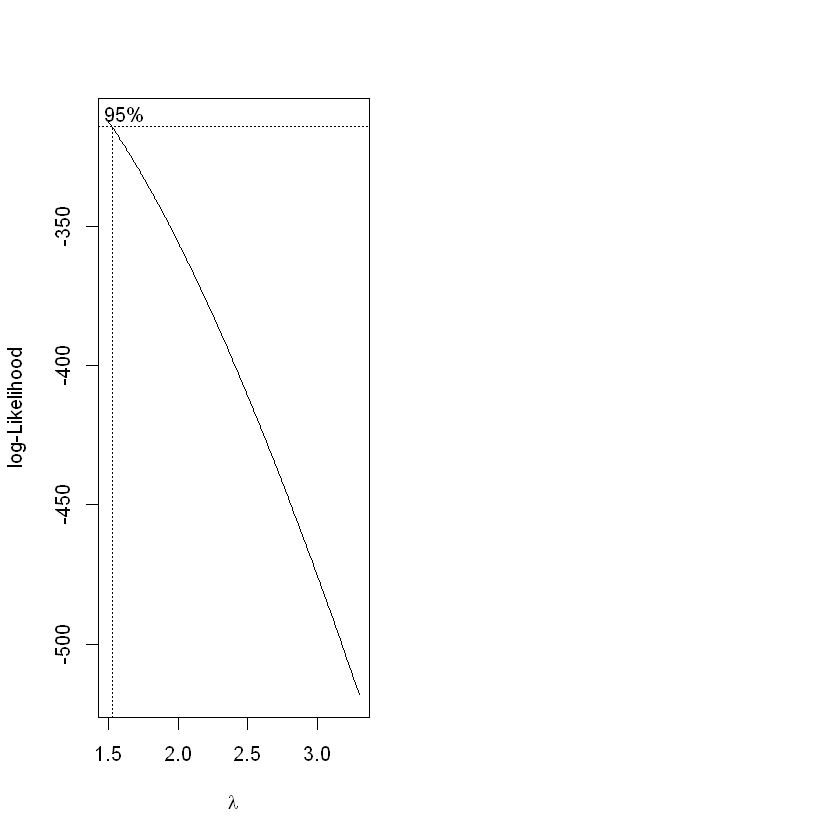

integer(0)

[1] "----------Levene's Test with Transformation----------"
[1] "if P(>F)>0.05, there is no evidence of non-constant variance."


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Break_Out,5,1269925,253985.06,15.02395,3.614877e-13
Residuals,300,5071604,16905.35,NA,NA


[1] "----------Comparison Test----------"
[1] "----------Constant Var----------"
  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Data_value ~ Break_Out, data = data)

$Break_Out
                  diff       lwr       upr     p adj
25-34-18-24  9.8669995  8.017360 11.716639 0.0000000
35-44-18-24 15.2385090 13.388869 17.088149 0.0000000
45-54-18-24 14.7705844 12.920945 16.620224 0.0000000
55-64-18-24 20.3660561 18.516416 22.215696 0.0000000
65+-18-24   30.5775656 28.727926 32.427205 0.0000000
35-44-25-34  5.3715094  3.643961  7.099058 0.0000000
45-54-25-34  4.9035849  3.176037  6.631133 0.0000000
55-64-25-34 10.4990566  8.771508 12.226605 0.0000000
65+-25-34   20.7105660 18.983018 22.438114 0.0000000
45-54-35-44 -0.4679245 -2.195473  1.259624 0.9712472
55-64-35-44  5.1275472  3.399999  6.855095 0.0000000
65+-35-44   15.3390566 13.611508 17.066605 0.0000000
55-64-45-54  5.5954717  3.867924  7.323020 0.0000000
65+-45-54   15.8069811 14.079433 

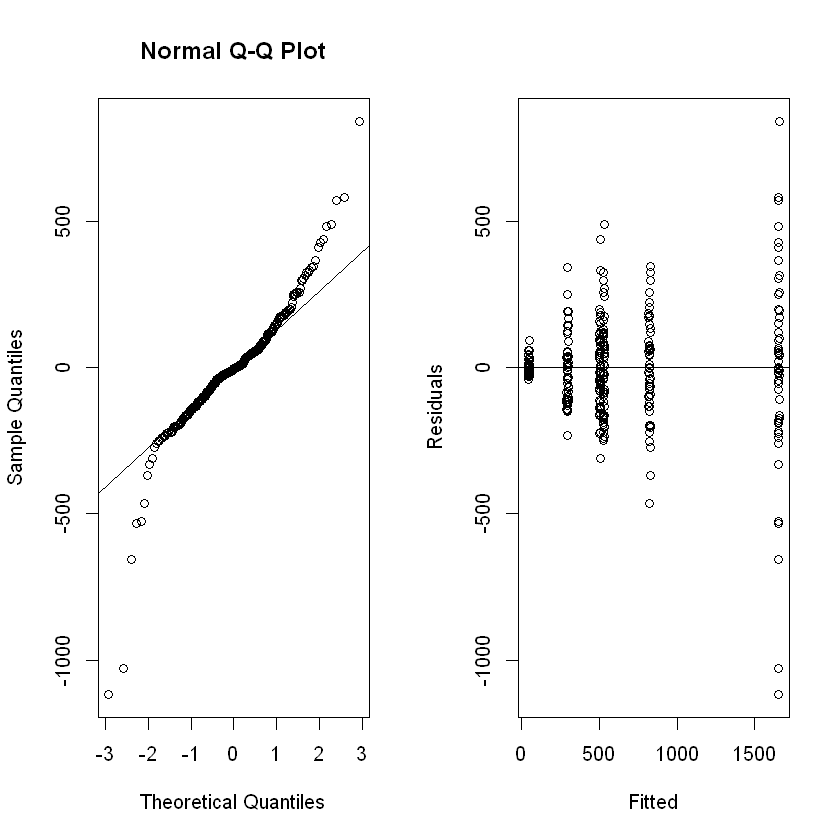

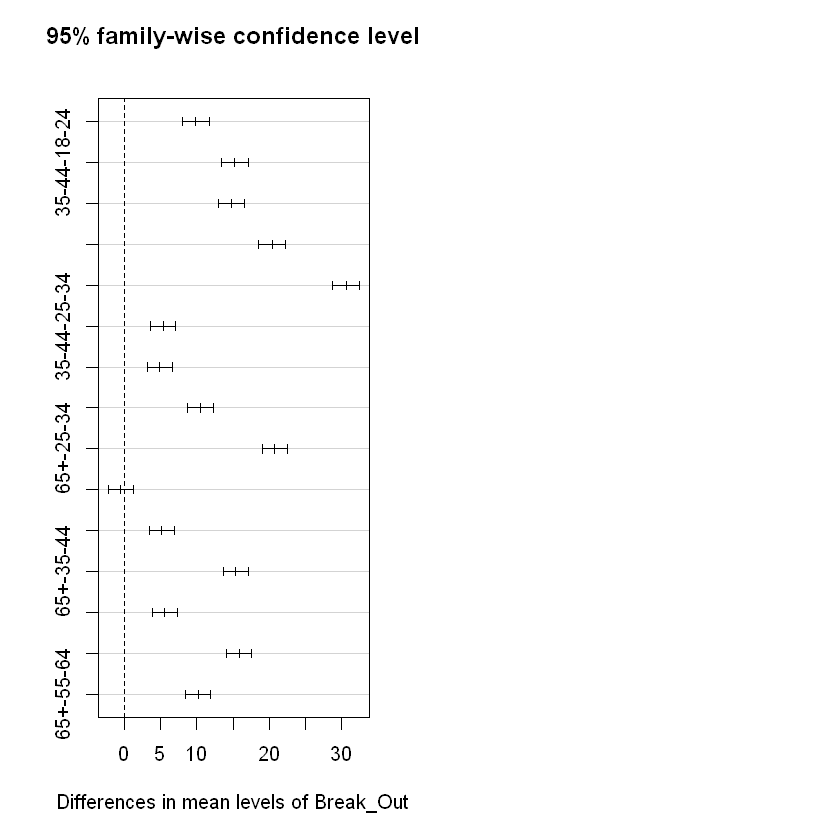

In [100]:
data = read.csv("C:/Users/Jun/Desktop/Courses/Datathon/FormerSmoker20Age.csv")
#data = read.csv("C:/Users/Jun/Desktop/Courses/Datathon/isCurrent2019Age.csv")
#data = read.csv("C:/Users/Jun/Desktop/Courses/Datathon/isCurrent2018Age.csv")
data$Break_Out=factor(data$Break_Out)
par(mfrow=c(1,2))
plot(Data_value~Break_Out,data,xlab="Age",ylab="Percentage of Former Smoker")
stripchart(Data_value~Break_Out,data,vertical=TRUE,method="stack",xlab="Age",ylab="Percentage of Former Smoker")
print("----------ANOVA with intercept----------")
print("if P(>F)<0.05, there is indeed a difference in the levels.")
lm = lm(Data_value~Break_Out,data)
#summary(lm)
anova(lm)
print("----------Fited model without intercept----------")
lmodi = lm(Data_value~Break_Out-1,data)
summary(lmodi)
print("----------Fited model without intercept ANOVA----------")
lmnull=lm(Data_value~1,data)
anova(lmnull,lmodi)
qqnorm(residuals(lm))
qqline(residuals(lm))
plot(jitter(fitted(lm)),residuals(lm),xlab="Fitted",ylab="Residuals")+abline(h=0)
print("----------Levene's Test----------")
print("if P(>F)>0.05, there is no evidence of non-constant variance.")
med = with(data,tapply(Data_value,Break_Out,median))
ar = with(data,abs(Data_value-med[Break_Out]))
anova(lm(ar~Break_Out,data))

print("----------Transformation----------")
require(MASS)
boxcox(lm,plotit=T,lambda=seq(1.5,3.3,by=0.01))
lmtr = lm(1/2.25*(Data_value^(2.25)-1)~Break_Out,data)
summary(lmtr)
par(mfrow=c(1,2))
qqnorm(residuals(lmtr))
qqline(residuals(lmtr))
plot(jitter(fitted(lmtr)),residuals(lmtr),xlab="Fitted",ylab="Residuals")+abline(h=0)
print("----------Levene's Test with Transformation----------")
print("if P(>F)>0.05, there is no evidence of non-constant variance.")
medtr = with(data,tapply(1/2.25*(Data_value^(2.25)-1),Break_Out,median))
artr = with(data,abs(1/2.25*(Data_value^(2.25)-1)-medtr[Break_Out]))
anova(lm(artr~Break_Out,data))

print("----------Comparison Test----------")
library(PMCMRplus)
vartest=anova(lm(ar~Break_Out,data))
if(vartest$`Pr(>F)`[1]<0.05){
    print("----------Non-constant Var----------")
    summary(tamhaneT2Test(data$Data_value,data$Break_Out))
}else{
    print("----------Constant Var----------")
    print(tci <- TukeyHSD(aov(Data_value~Break_Out,data)))
    plot(tci)
}

[1] "----------ANOVA with intercept----------"
[1] "if P(>F)<0.05, there is indeed a difference in the levels."


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Break_Out,4,1022.908,255.72690,18.00354,4.647026e-13
Residuals,259,3678.902,14.20425,NA,NA


[1] "----------Fited model without intercept----------"



Call:
lm(formula = Data_value ~ Break_Out - 1, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-12.729  -2.057   0.125   2.464  10.059 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
Break_Out$15,000-$24,999    24.0485     0.5177   46.45   <2e-16 ***
Break_Out$25,000-$34,999    25.6415     0.5177   49.53   <2e-16 ***
Break_Out$35,000-$49,999    26.5260     0.5177   51.24   <2e-16 ***
Break_Out$50,000+           25.7004     0.5177   49.64   <2e-16 ***
Break_OutLess than $15,000  20.9612     0.5226   40.11   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.769 on 259 degrees of freedom
Multiple R-squared:  0.9776,	Adjusted R-squared:  0.9772 
F-statistic:  2262 on 5 and 259 DF,  p-value: < 2.2e-16


[1] "----------Fited model without intercept ANOVA----------"


Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
263,4701.809,NA,NA,NA,NA
259,3678.902,4,1022.908,18.00354,4.647026e-13


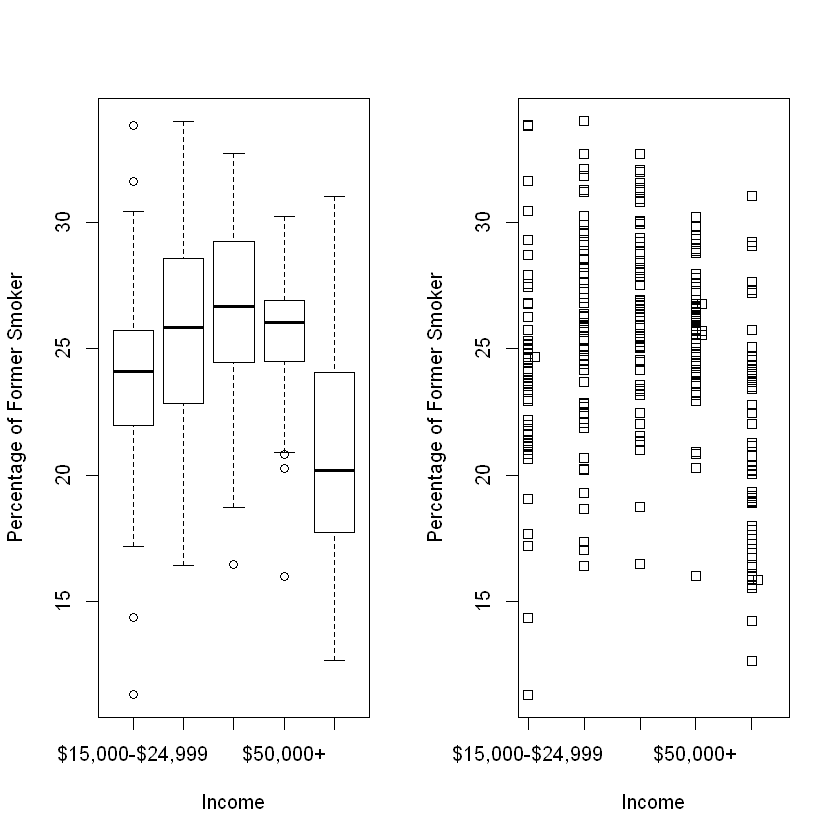

integer(0)

[1] "----------Levene's Test----------"
[1] "if P(>F)>0.05, there is no evidence of non-constant variance."


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Break_Out,4,81.38956,20.347390,3.453735,0.009031984
Residuals,259,1525.87691,5.891417,NA,NA


[1] "----------Transformation----------"



Call:
lm(formula = log(Data_value/(100 - Data_value)) ~ Break_Out, 
    data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.89423 -0.10613  0.01742  0.14315  0.54648 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                -1.16424    0.02939 -39.615  < 2e-16 ***
Break_Out$25,000-$34,999    0.08742    0.04156   2.103  0.03640 *  
Break_Out$35,000-$49,999    0.13689    0.04156   3.294  0.00113 ** 
Break_Out$50,000+           0.09775    0.04156   2.352  0.01943 *  
Break_OutLess than $15,000 -0.18143    0.04176  -4.344 2.01e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.214 on 259 degrees of freedom
Multiple R-squared:  0.2226,	Adjusted R-squared:  0.2106 
F-statistic: 18.54 on 4 and 259 DF,  p-value: 2.046e-13


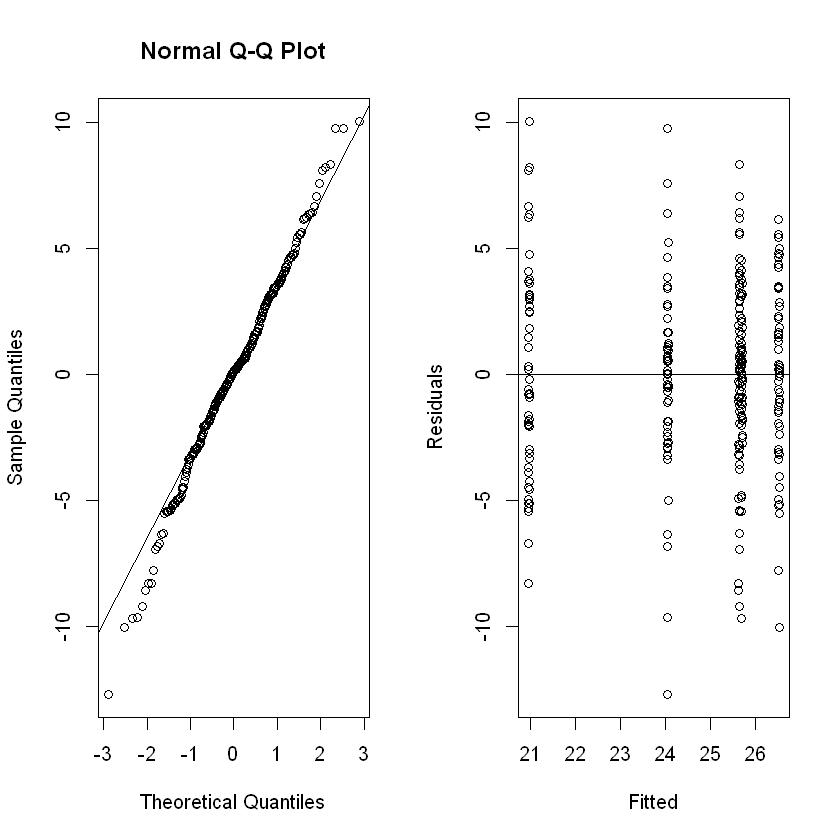

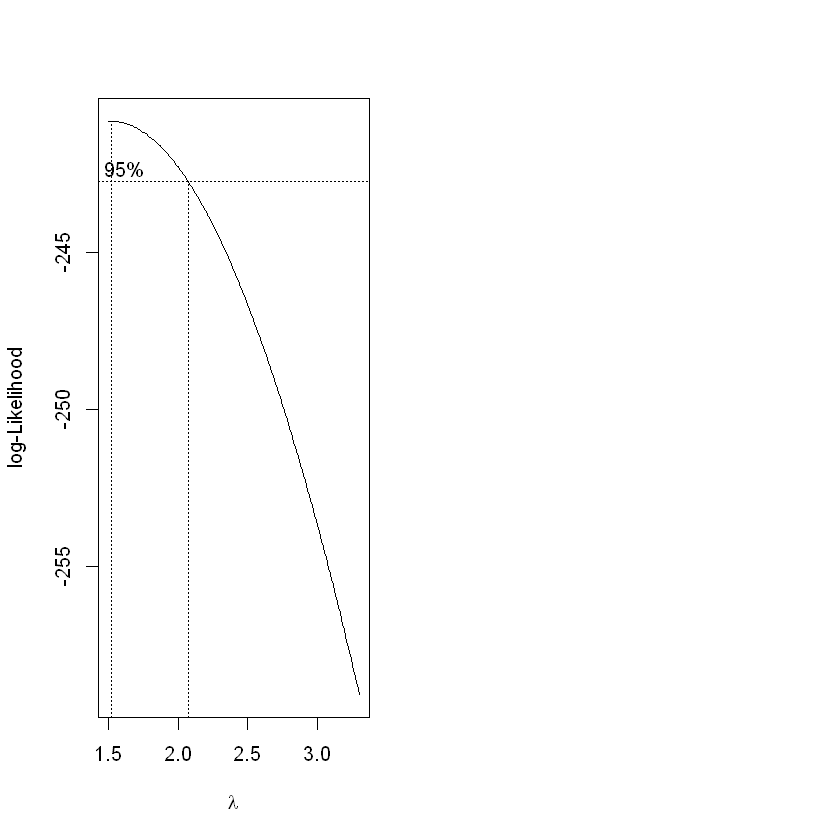

integer(0)

[1] "----------Levene's Test with Transformation----------"
[1] "if P(>F)>0.05, there is no evidence of non-constant variance."


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Break_Out,4,0.3439672,0.08599179,4.342844,0.002041279
Residuals,259,5.1284077,0.01980080,NA,NA


[1] "----------Comparison Test----------"
[1] "----------Non-constant Var----------"



	Pairwise comparisons using Tamhane's T2-test for unequal variances

data: data$Data_value and data$Break_Out
alternative hypothesis: two.sided
P value adjustment method: T2 (Sidak)
H0


                                         t value   Pr(>|t|)    
$25,000-$34,999 - $15,000-$24,999 == 0     1.999  0.3902050    
$35,000-$49,999 - $15,000-$24,999 == 0     3.317  0.0125035   *
$50,000+ - $15,000-$24,999 == 0            2.499  0.1344002    
Less than $15,000 - $15,000-$24,999 == 0  -3.821  0.0022794  **
$35,000-$49,999 - $25,000-$34,999 == 0     1.172  0.9389089    
$50,000+ - $25,000-$34,999 == 0            0.088  1.0000000    
Less than $15,000 - $25,000-$34,999 == 0  -5.741 9.5982e-07 ***
$50,000+ - $35,000-$49,999 == 0           -1.355  0.8602690    
Less than $15,000 - $35,000-$49,999 == 0  -7.263 8.4081e-10 ***
Less than $15,000 - $50,000+ == 0         -6.939 7.5952e-09 ***


---
Signif. codes: 0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


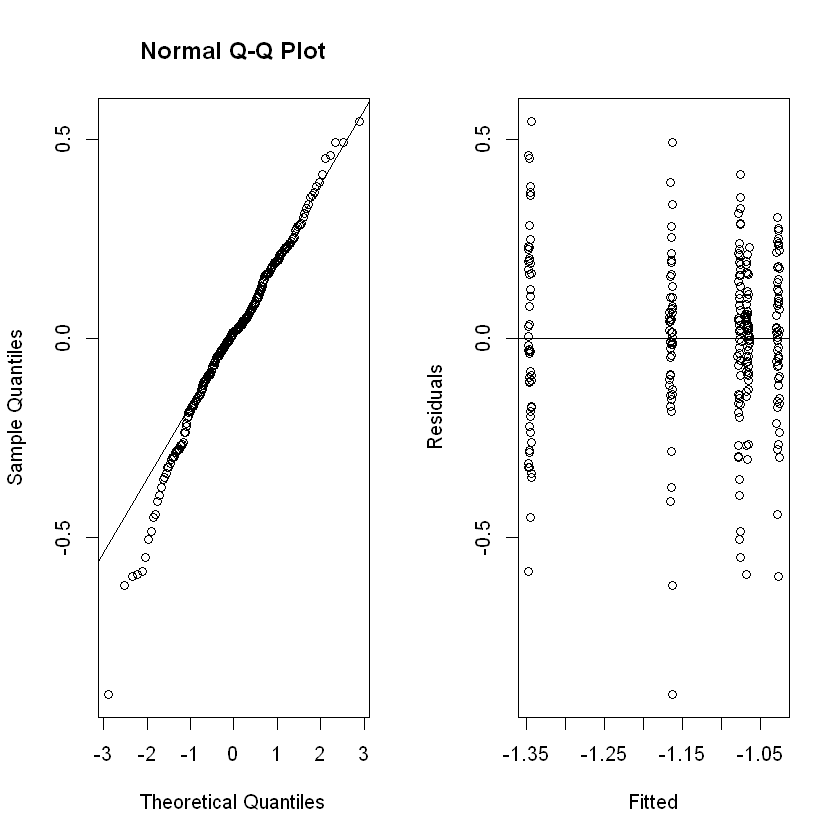

In [106]:
data = read.csv("C:/Users/Jun/Desktop/Courses/Datathon/FormerSmoker20Income.csv")
#data = read.csv("C:/Users/Jun/Desktop/Courses/Datathon/isCurrent2019Age.csv")
#data = read.csv("C:/Users/Jun/Desktop/Courses/Datathon/isCurrent2018Age.csv")
data$Break_Out=factor(data$Break_Out)
par(mfrow=c(1,2))
plot(Data_value~Break_Out,data,xlab="Income",ylab="Percentage of Former Smoker")
stripchart(Data_value~Break_Out,data,vertical=TRUE,method="stack",xlab="Income",ylab="Percentage of Former Smoker")
print("----------ANOVA with intercept----------")
print("if P(>F)<0.05, there is indeed a difference in the levels.")
lm = lm(Data_value~Break_Out,data)
#summary(lm)
anova(lm)
print("----------Fited model without intercept----------")
lmodi = lm(Data_value~Break_Out-1,data)
summary(lmodi)
print("----------Fited model without intercept ANOVA----------")
lmnull=lm(Data_value~1,data)
anova(lmnull,lmodi)
qqnorm(residuals(lm))
qqline(residuals(lm))
plot(jitter(fitted(lm)),residuals(lm),xlab="Fitted",ylab="Residuals")+abline(h=0)
print("----------Levene's Test----------")
print("if P(>F)>0.05, there is no evidence of non-constant variance.")
med = with(data,tapply(Data_value,Break_Out,median))
ar = with(data,abs(Data_value-med[Break_Out]))
anova(lm(ar~Break_Out,data))

print("----------Transformation----------")
require(MASS)
boxcox(lm,plotit=T,lambda=seq(1.5,3.3,by=0.01))
lmtr = lm(log(Data_value/(100-Data_value))~Break_Out,data)
summary(lmtr)
par(mfrow=c(1,2))
qqnorm(residuals(lmtr))
qqline(residuals(lmtr))
plot(jitter(fitted(lmtr)),residuals(lmtr),xlab="Fitted",ylab="Residuals")+abline(h=0)
print("----------Levene's Test with Transformation----------")
print("if P(>F)>0.05, there is no evidence of non-constant variance.")
medtr = with(data,tapply(log(Data_value/(100-Data_value)),Break_Out,median))
artr = with(data,abs(log(Data_value/(100-Data_value))-medtr[Break_Out]))
anova(lm(artr~Break_Out,data))

print("----------Comparison Test----------")
library(PMCMRplus)
vartest=anova(lm(ar~Break_Out,data))
if(vartest$`Pr(>F)`[1]<0.05){
    print("----------Non-constant Var----------")
    summary(tamhaneT2Test(data$Data_value,data$Break_Out))
}else{
    print("----------Constant Var----------")
    print(tci <- TukeyHSD(aov(Data_value~Break_Out,data)))
    plot(tci)
}

[1] "----------ANOVA with intercept----------"
[1] "if P(>F)<0.05, there is indeed a difference in the levels."


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Break_Out,3,838.9311,279.64369,23.86147,2.643727e-13
Residuals,207,2425.9298,11.71947,NA,NA


[1] "----------Fited model without intercept----------"



Call:
lm(formula = Data_value ~ Break_Out - 1, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.8702  -1.7002  -0.0508   2.1167   9.0042 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
Break_OutCollege graduate  21.1558     0.4702   44.99   <2e-16 ***
Break_OutH.S. or G.E.D.    25.5408     0.4702   54.31   <2e-16 ***
Break_OutLess than H.S.    24.9658     0.4747   52.59   <2e-16 ***
Break_OutSome post-H.S.    26.3302     0.4702   55.99   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.423 on 207 degrees of freedom
Multiple R-squared:  0.9813,	Adjusted R-squared:  0.981 
F-statistic:  2719 on 4 and 207 DF,  p-value: < 2.2e-16


[1] "----------Fited model without intercept ANOVA----------"


Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
210,3264.861,NA,NA,NA,NA
207,2425.930,3,838.9311,23.86147,2.643727e-13


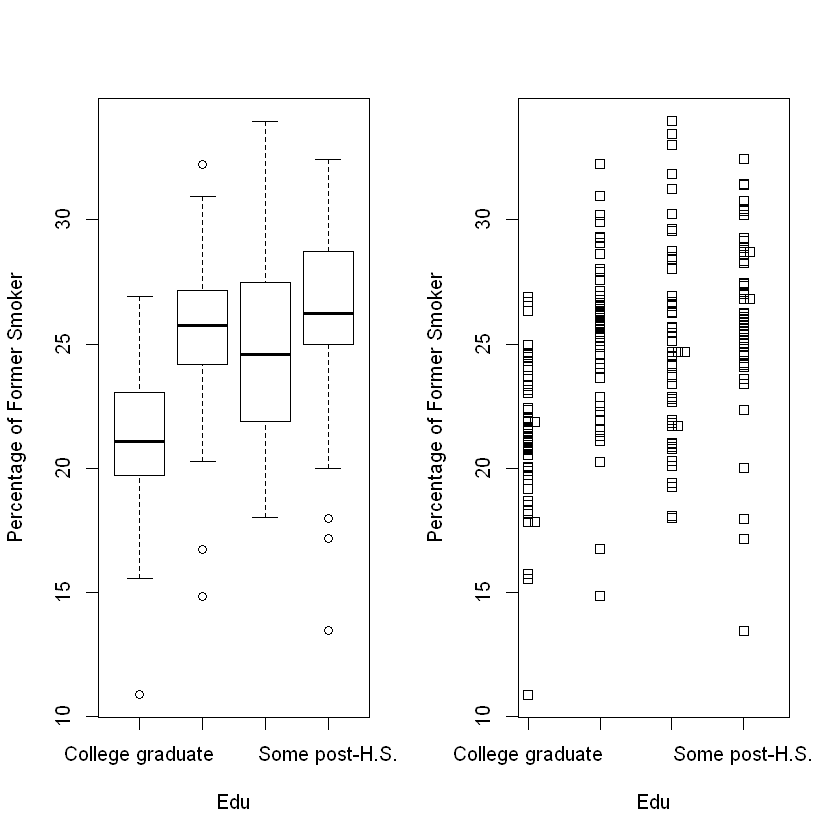

integer(0)

[1] "----------Levene's Test----------"
[1] "if P(>F)>0.05, there is no evidence of non-constant variance."


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Break_Out,3,32.72146,10.907154,2.068362,0.1055183
Residuals,207,1091.57895,5.273328,NA,NA


[1] "----------Transformation----------"



Call:
lm(formula = log(Data_value/(100 - Data_value)) ~ Break_Out, 
    data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.82246 -0.09076  0.00626  0.12421  0.44651 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)             -1.32517    0.02671 -49.605  < 2e-16 ***
Break_OutH.S. or G.E.D.  0.24736    0.03778   6.547 4.54e-10 ***
Break_OutLess than H.S.  0.21403    0.03796   5.638 5.58e-08 ***
Break_OutSome post-H.S.  0.28675    0.03778   7.590 1.07e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1945 on 207 degrees of freedom
Multiple R-squared:  0.2501,	Adjusted R-squared:  0.2393 
F-statistic: 23.02 on 3 and 207 DF,  p-value: 6.716e-13


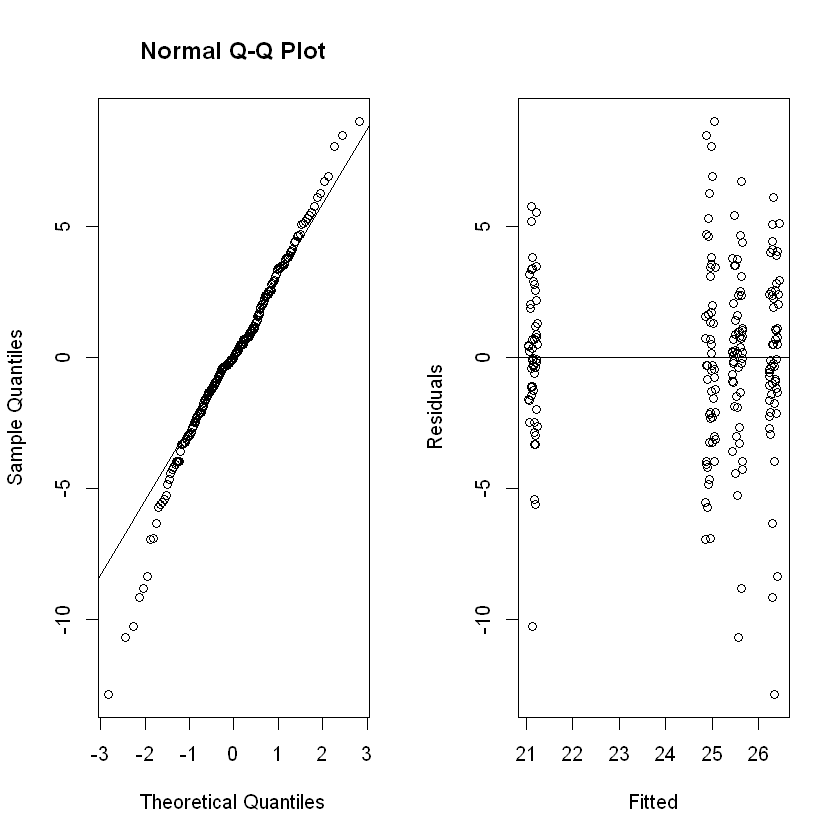

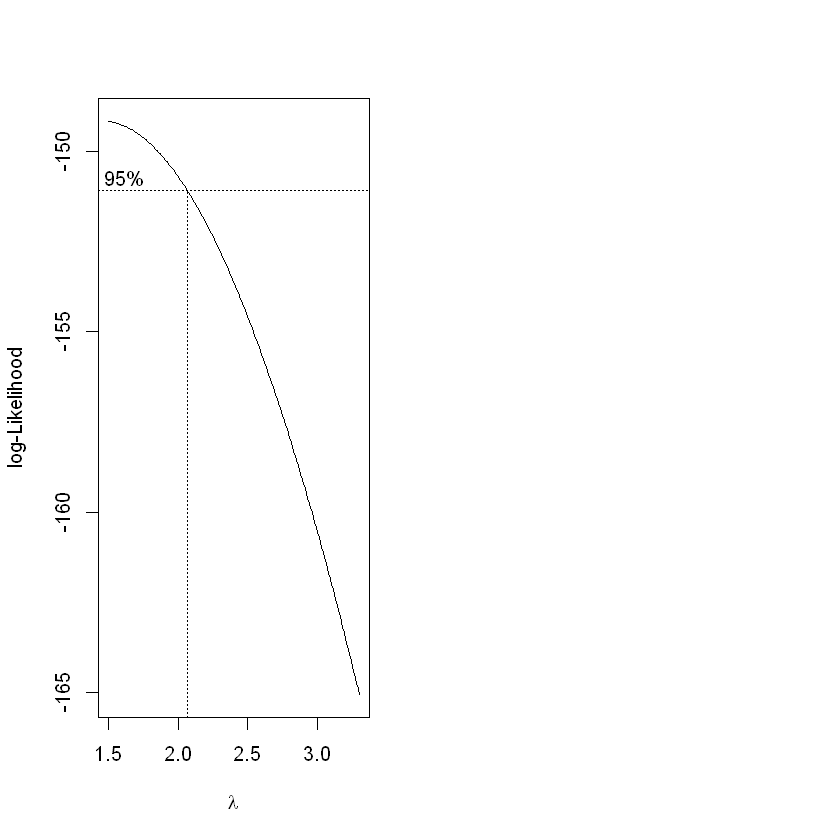

integer(0)

[1] "----------Levene's Test with Transformation----------"
[1] "if P(>F)>0.05, there is no evidence of non-constant variance."


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Break_Out,3,0.06460814,0.02153605,1.176721,0.3196192
Residuals,207,3.78846088,0.01830174,NA,NA


[1] "----------Comparison Test----------"
[1] "----------Constant Var----------"
  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Data_value ~ Break_Out, data = data)

$Break_Out
                                      diff        lwr      upr     p adj
H.S. or G.E.D.-College graduate  4.3849057  2.6625039 6.107307 0.0000000
Less than H.S.-College graduate  3.8099202  2.0792574 5.540583 0.0000002
Some post-H.S.-College graduate  5.1743396  3.4519379 6.896741 0.0000000
Less than H.S.-H.S. or G.E.D.   -0.5749855 -2.3056482 1.155677 0.8251521
Some post-H.S.-H.S. or G.E.D.    0.7894340 -0.9329678 2.511836 0.6356878
Some post-H.S.-Less than H.S.    1.3644194 -0.3662433 3.095082 0.1761135



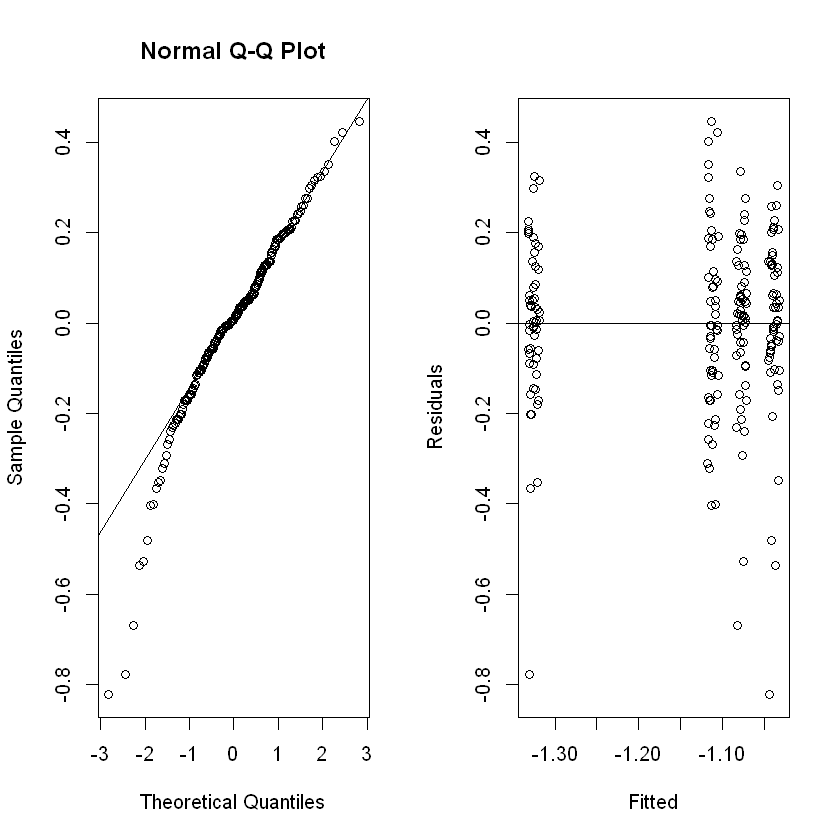

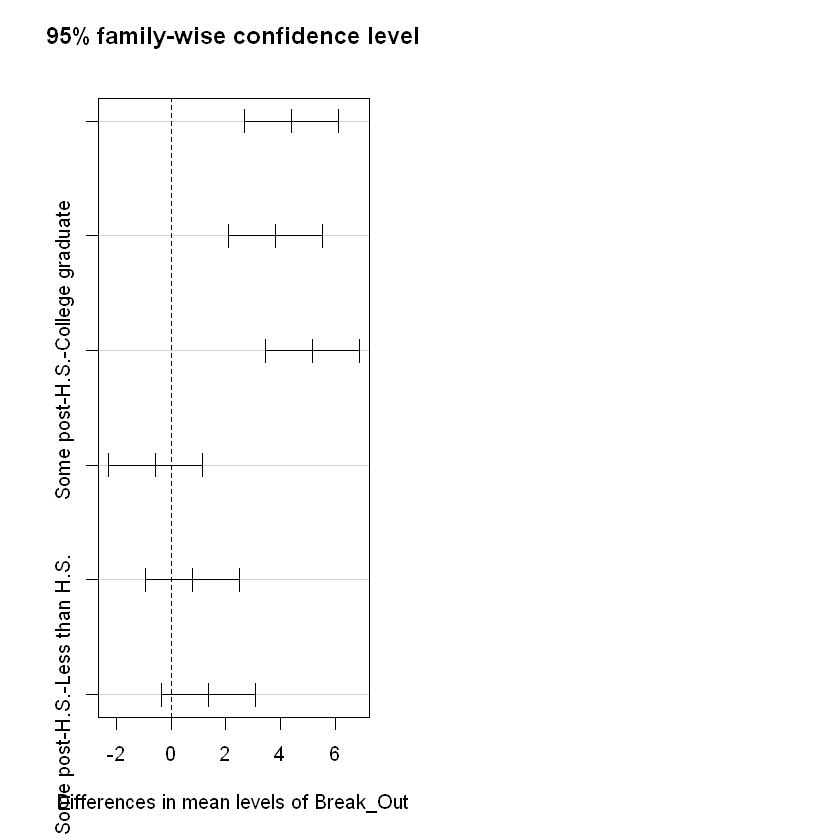

In [107]:
data = read.csv("C:/Users/Jun/Desktop/Courses/Datathon/FormerSmoker20Edu.csv")
#data = read.csv("C:/Users/Jun/Desktop/Courses/Datathon/isCurrent2019Age.csv")
#data = read.csv("C:/Users/Jun/Desktop/Courses/Datathon/isCurrent2018Age.csv")
data$Break_Out=factor(data$Break_Out)
par(mfrow=c(1,2))
plot(Data_value~Break_Out,data,xlab="Edu",ylab="Percentage of Former Smoker")
stripchart(Data_value~Break_Out,data,vertical=TRUE,method="stack",xlab="Edu",ylab="Percentage of Former Smoker")
print("----------ANOVA with intercept----------")
print("if P(>F)<0.05, there is indeed a difference in the levels.")
lm = lm(Data_value~Break_Out,data)
#summary(lm)
anova(lm)
print("----------Fited model without intercept----------")
lmodi = lm(Data_value~Break_Out-1,data)
summary(lmodi)
print("----------Fited model without intercept ANOVA----------")
lmnull=lm(Data_value~1,data)
anova(lmnull,lmodi)
qqnorm(residuals(lm))
qqline(residuals(lm))
plot(jitter(fitted(lm)),residuals(lm),xlab="Fitted",ylab="Residuals")+abline(h=0)
print("----------Levene's Test----------")
print("if P(>F)>0.05, there is no evidence of non-constant variance.")
med = with(data,tapply(Data_value,Break_Out,median))
ar = with(data,abs(Data_value-med[Break_Out]))
anova(lm(ar~Break_Out,data))

print("----------Transformation----------")
require(MASS)
boxcox(lm,plotit=T,lambda=seq(1.5,3.3,by=0.01))
lmtr = lm(log(Data_value/(100-Data_value))~Break_Out,data)
summary(lmtr)
par(mfrow=c(1,2))
qqnorm(residuals(lmtr))
qqline(residuals(lmtr))
plot(jitter(fitted(lmtr)),residuals(lmtr),xlab="Fitted",ylab="Residuals")+abline(h=0)
print("----------Levene's Test with Transformation----------")
print("if P(>F)>0.05, there is no evidence of non-constant variance.")
medtr = with(data,tapply(log(Data_value/(100-Data_value)),Break_Out,median))
artr = with(data,abs(log(Data_value/(100-Data_value))-medtr[Break_Out]))
anova(lm(artr~Break_Out,data))

print("----------Comparison Test----------")
library(PMCMRplus)
vartest=anova(lm(ar~Break_Out,data))
if(vartest$`Pr(>F)`[1]<0.05){
    print("----------Non-constant Var----------")
    summary(tamhaneT2Test(data$Data_value,data$Break_Out))
}else{
    print("----------Constant Var----------")
    print(tci <- TukeyHSD(aov(Data_value~Break_Out,data)))
    plot(tci)
}

[1] "----------ANOVA with intercept----------"
[1] "if P(>F)<0.05, there is indeed a difference in the levels."


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Break_Out,5,34408.048,6881.60969,217.0837,2.660916e-99
Residuals,312,9890.481,31.70026,NA,NA


[1] "----------Fited model without intercept----------"



Call:
lm(formula = Data_value ~ Break_Out - 1, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.9977  -3.5882  -0.4172   3.3372  20.7915 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
Break_Out18-24  83.3581     0.7734  107.78   <2e-16 ***
Break_Out25-34  63.8177     0.7734   82.52   <2e-16 ***
Break_Out35-44  56.5762     0.7734   73.15   <2e-16 ***
Break_Out45-54  59.7758     0.7734   77.29   <2e-16 ***
Break_Out55-64  54.0553     0.7734   69.89   <2e-16 ***
Break_Out65+    52.3585     0.7734   67.70   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.63 on 312 degrees of freedom
Multiple R-squared:  0.9921,	Adjusted R-squared:  0.992 
F-statistic:  6537 on 6 and 312 DF,  p-value: < 2.2e-16


[1] "----------Fited model without intercept ANOVA----------"


Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
317,44298.530,NA,NA,NA,NA
312,9890.481,5,34408.05,217.0837,2.660916e-99


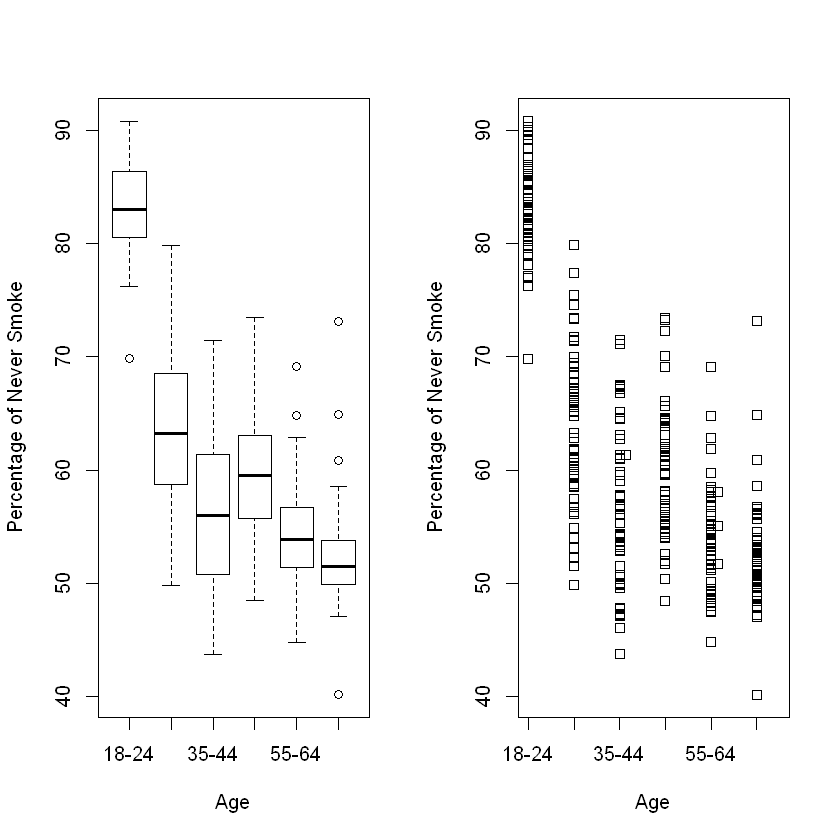

integer(0)

[1] "----------Levene's Test----------"
[1] "if P(>F)>0.05, there is no evidence of non-constant variance."


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Break_Out,5,364.120,72.82399,6.133646,1.942019e-05
Residuals,312,3704.336,11.87287,NA,NA


[1] "----------Transformation----------"



Call:
lm(formula = log(Data_value/(100 - Data_value)) ~ Break_Out, 
    data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.80208 -0.16617 -0.02258  0.14129  0.90582 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     1.64224    0.03591   45.73   <2e-16 ***
Break_Out25-34 -1.06140    0.05079  -20.90   <2e-16 ***
Break_Out35-44 -1.37159    0.05079  -27.01   <2e-16 ***
Break_Out45-54 -1.23989    0.05079  -24.41   <2e-16 ***
Break_Out55-64 -1.47783    0.05079  -29.10   <2e-16 ***
Break_Out65+   -1.54581    0.05079  -30.44   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2614 on 312 degrees of freedom
Multiple R-squared:  0.8035,	Adjusted R-squared:  0.8003 
F-statistic: 255.1 on 5 and 312 DF,  p-value: < 2.2e-16


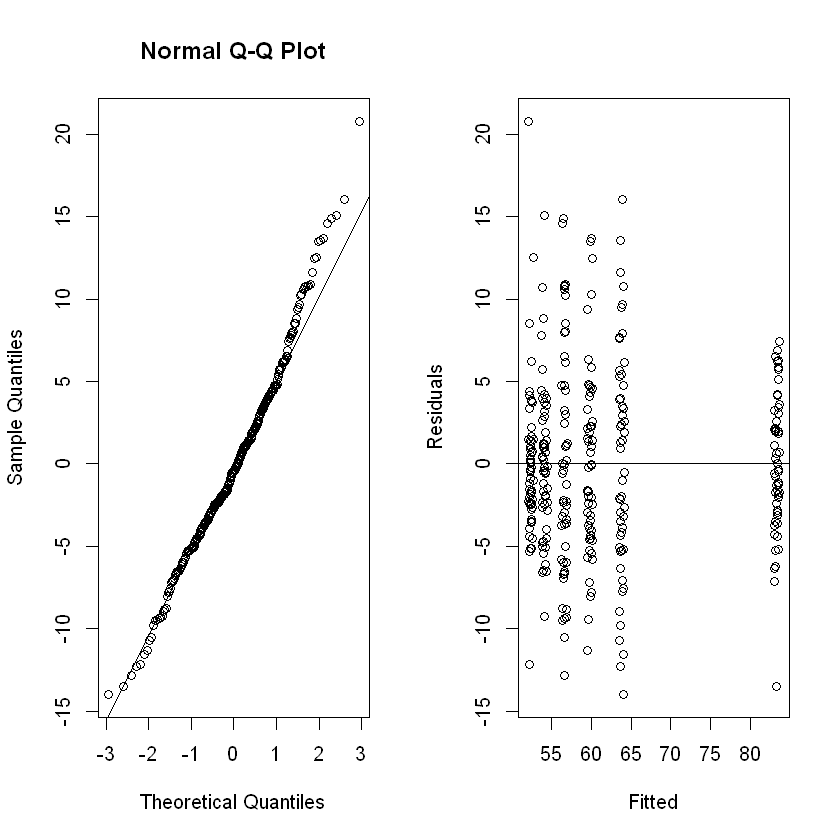

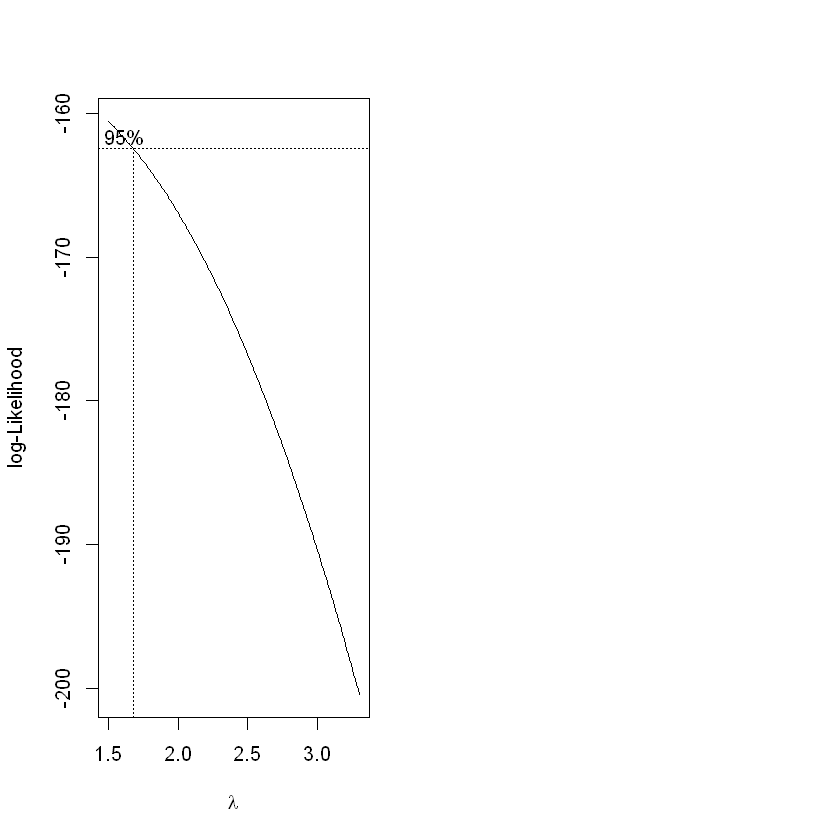

integer(0)

[1] "----------Levene's Test with Transformation----------"
[1] "if P(>F)>0.05, there is no evidence of non-constant variance."


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Break_Out,5,0.8015831,0.16031663,6.032797,2.392562e-05
Residuals,312,8.2911443,0.02657418,NA,NA


[1] "----------Comparison Test----------"
[1] "----------Non-constant Var----------"



	Pairwise comparisons using Tamhane's T2-test for unequal variances

data: data$Data_value and data$Break_Out
alternative hypothesis: two.sided
P value adjustment method: T2 (Sidak)
H0


                   t value   Pr(>|t|)    
25-34 - 18-24 == 0 -17.543 < 2.22e-16 ***
35-44 - 18-24 == 0 -24.008 < 2.22e-16 ***
45-54 - 18-24 == 0 -24.324 < 2.22e-16 ***
55-64 - 18-24 == 0 -34.123 < 2.22e-16 ***
65+ - 18-24 == 0   -35.270 < 2.22e-16 ***
35-44 - 25-34 == 0  -5.380 6.9414e-06 ***
45-54 - 25-34 == 0  -3.292  0.0204351   *
55-64 - 25-34 == 0  -8.546 4.3632e-12 ***
65+ - 25-34 == 0    -9.899 4.9960e-15 ***
45-54 - 35-44 == 0   2.603  0.1484118    
55-64 - 35-44 == 0  -2.204  0.3676108    
65+ - 35-44 == 0    -3.638  0.0067458  **
55-64 - 45-54 == 0  -5.709 1.7571e-06 ***
65+ - 45-54 == 0    -7.276 1.1214e-09 ***
65+ - 55-64 == 0    -1.855  0.6434937    


---
Signif. codes: 0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


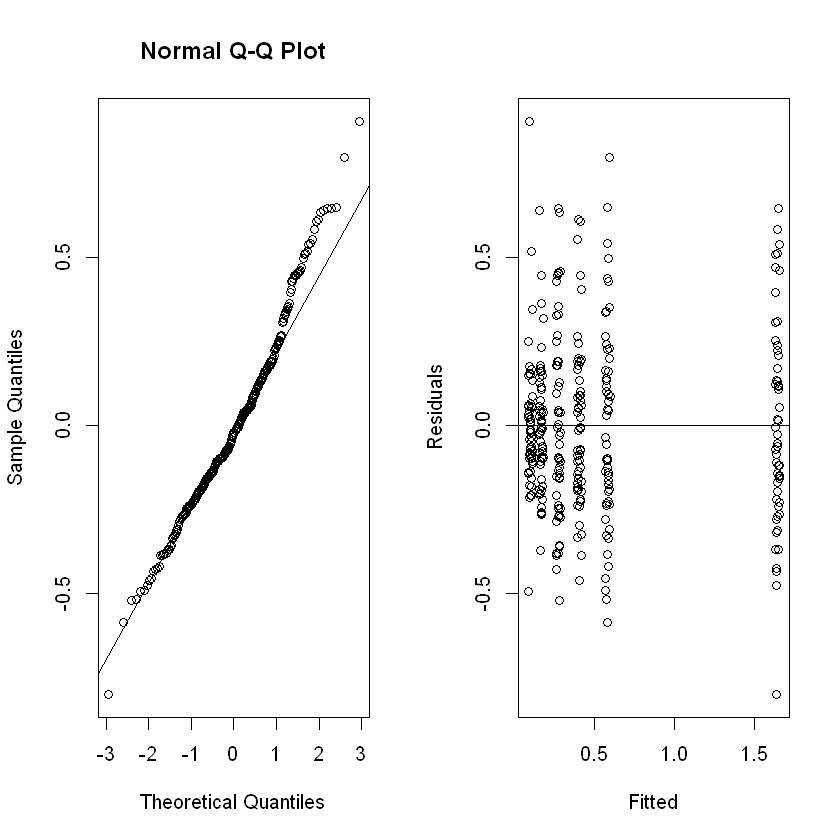

In [108]:
data = read.csv("C:/Users/Jun/Desktop/Courses/Datathon/NeverSmoke20Age.csv")
#data = read.csv("C:/Users/Jun/Desktop/Courses/Datathon/isCurrent2019Age.csv")
#data = read.csv("C:/Users/Jun/Desktop/Courses/Datathon/isCurrent2018Age.csv")
data$Break_Out=factor(data$Break_Out)
par(mfrow=c(1,2))
plot(Data_value~Break_Out,data,xlab="Age",ylab="Percentage of Never Smoke")
stripchart(Data_value~Break_Out,data,vertical=TRUE,method="stack",xlab="Age",ylab="Percentage of Never Smoke")
print("----------ANOVA with intercept----------")
print("if P(>F)<0.05, there is indeed a difference in the levels.")
lm = lm(Data_value~Break_Out,data)
#summary(lm)
anova(lm)
print("----------Fited model without intercept----------")
lmodi = lm(Data_value~Break_Out-1,data)
summary(lmodi)
print("----------Fited model without intercept ANOVA----------")
lmnull=lm(Data_value~1,data)
anova(lmnull,lmodi)
qqnorm(residuals(lm))
qqline(residuals(lm))
plot(jitter(fitted(lm)),residuals(lm),xlab="Fitted",ylab="Residuals")+abline(h=0)
print("----------Levene's Test----------")
print("if P(>F)>0.05, there is no evidence of non-constant variance.")
med = with(data,tapply(Data_value,Break_Out,median))
ar = with(data,abs(Data_value-med[Break_Out]))
anova(lm(ar~Break_Out,data))

print("----------Transformation----------")
require(MASS)
boxcox(lm,plotit=T,lambda=seq(1.5,3.3,by=0.01))
lmtr = lm(log(Data_value/(100-Data_value))~Break_Out,data)
summary(lmtr)
par(mfrow=c(1,2))
qqnorm(residuals(lmtr))
qqline(residuals(lmtr))
plot(jitter(fitted(lmtr)),residuals(lmtr),xlab="Fitted",ylab="Residuals")+abline(h=0)
print("----------Levene's Test with Transformation----------")
print("if P(>F)>0.05, there is no evidence of non-constant variance.")
medtr = with(data,tapply(log(Data_value/(100-Data_value)),Break_Out,median))
artr = with(data,abs(log(Data_value/(100-Data_value))-medtr[Break_Out]))
anova(lm(artr~Break_Out,data))

print("----------Comparison Test----------")
library(PMCMRplus)
vartest=anova(lm(ar~Break_Out,data))
if(vartest$`Pr(>F)`[1]<0.05){
    print("----------Non-constant Var----------")
    summary(tamhaneT2Test(data$Data_value,data$Break_Out))
}else{
    print("----------Constant Var----------")
    print(tci <- TukeyHSD(aov(Data_value~Break_Out,data)))
    plot(tci)
}

[1] "----------ANOVA with intercept----------"
[1] "if P(>F)<0.05, there is indeed a difference in the levels."


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Break_Out,1,2492.997,2492.9970,96.02558,1.890961e-16
Residuals,104,2700.027,25.9618,NA,NA


[1] "----------Fited model without intercept----------"



Call:
lm(formula = Data_value ~ Break_Out - 1, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.0808 -3.3834 -0.6115  2.5562 17.3892 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
Break_OutFemale  64.9708     0.6999   92.83   <2e-16 ***
Break_OutMale    55.2715     0.6999   78.97   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.095 on 104 degrees of freedom
Multiple R-squared:  0.993,	Adjusted R-squared:  0.9929 
F-statistic:  7427 on 2 and 104 DF,  p-value: < 2.2e-16


[1] "----------Fited model without intercept ANOVA----------"


Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
105,5193.024,NA,NA,NA,NA
104,2700.027,1,2492.997,96.02558,1.890961e-16


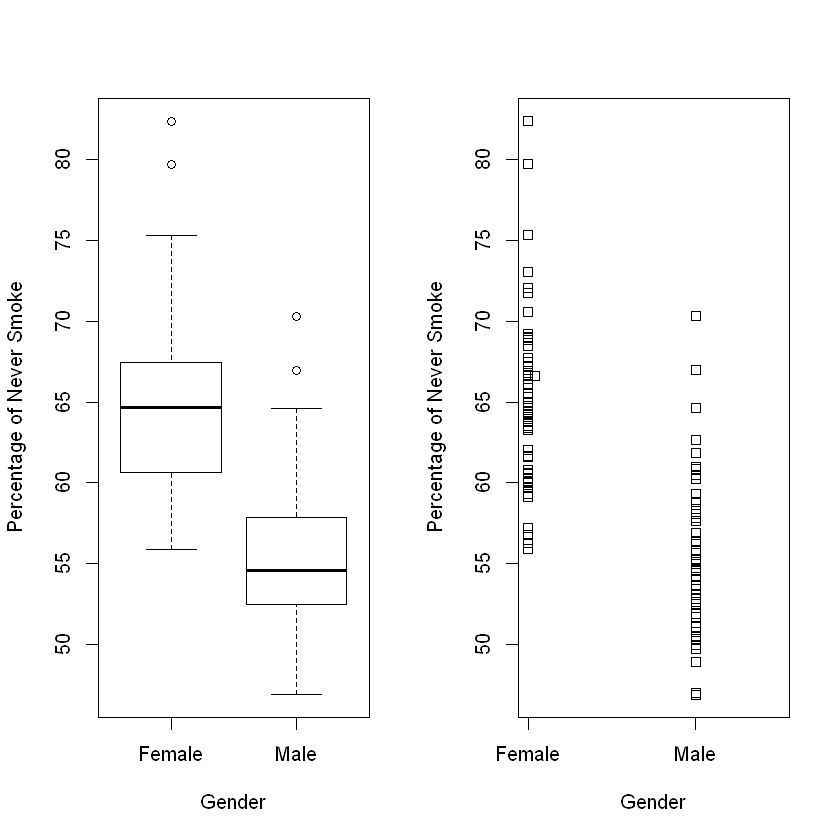

integer(0)

[1] "----------Levene's Test----------"
[1] "if P(>F)>0.05, there is no evidence of non-constant variance."


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Break_Out,1,5.727638,5.727638,0.5030668,0.4797428
Residuals,104,1184.085958,11.385442,NA,NA


[1] "----------Transformation----------"



Call:
lm(formula = -(Data_value^(-1) - 1) ~ Break_Out, data = data)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0031050 -0.0009264 -0.0000682  0.0008309  0.0039943 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.9845086  0.0001874 5253.60   <2e-16 ***
Break_OutMale -0.0027256  0.0002650  -10.28   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.001364 on 104 degrees of freedom
Multiple R-squared:  0.5042,	Adjusted R-squared:  0.4995 
F-statistic: 105.8 on 1 and 104 DF,  p-value: < 2.2e-16


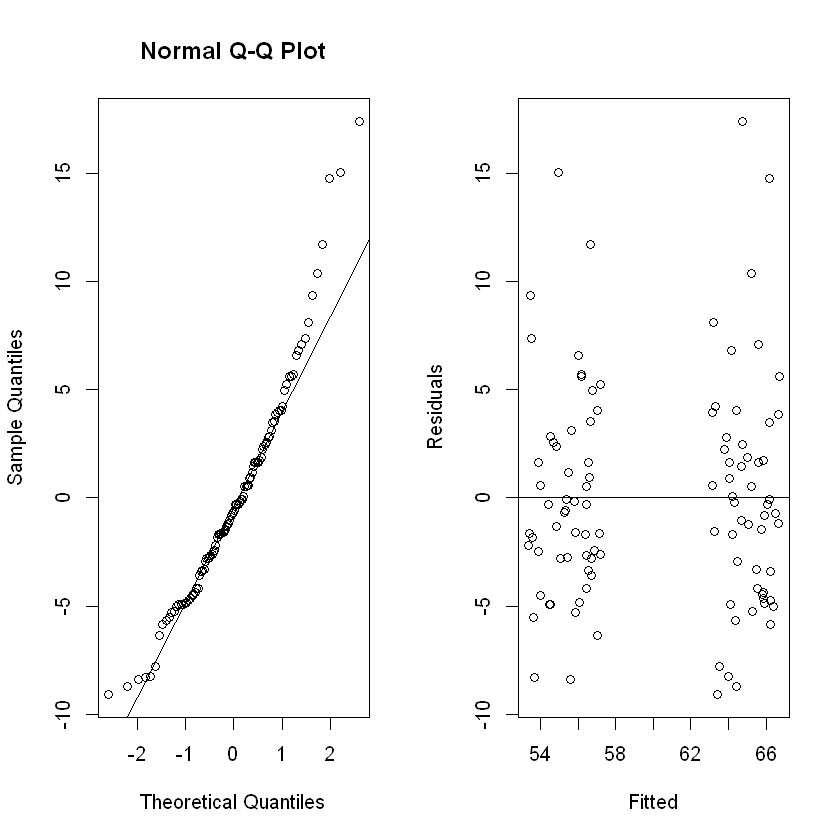

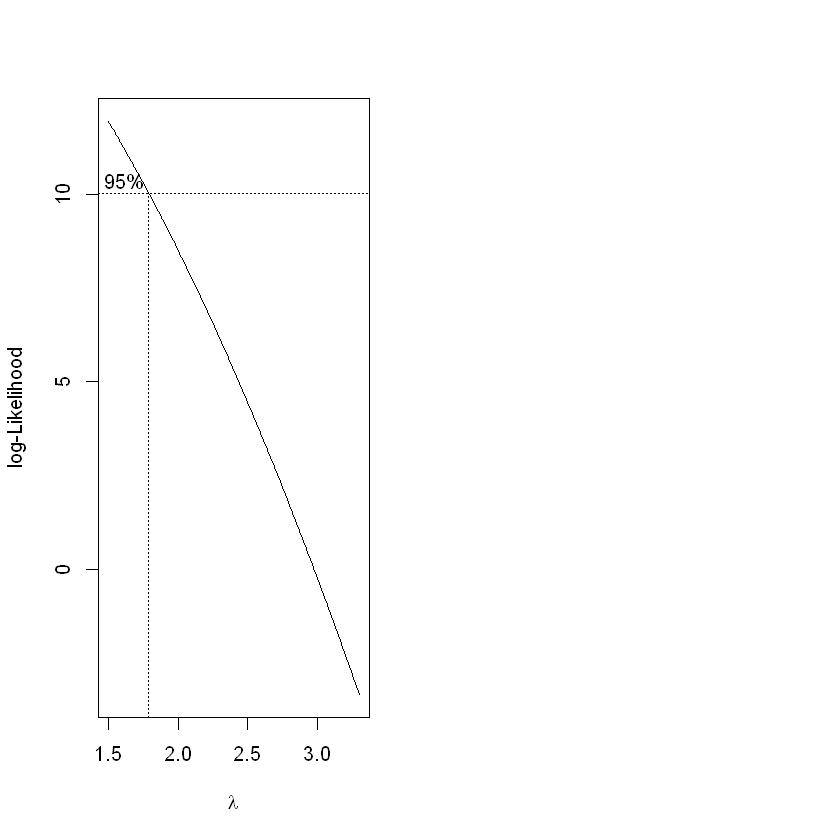

integer(0)

[1] "----------Levene's Test with Transformation----------"
[1] "if P(>F)>0.05, there is no evidence of non-constant variance."


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Break_Out,1,1.140188e-06,1.140188e-06,1.572106,0.2127126
Residuals,104,7.542720e-05,7.252615e-07,NA,NA


[1] "----------Comparison Test----------"
[1] "----------Constant Var----------"
  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Data_value ~ Break_Out, data = data)

$Break_Out
                 diff       lwr       upr p adj
Male-Female -9.699245 -11.66204 -7.736448     0

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = -(Data_value^(-1) - 1) ~ Break_Out, data = data)

$Break_Out
                    diff          lwr          upr p adj
Male-Female -0.002725573 -0.003251116 -0.002200029     0



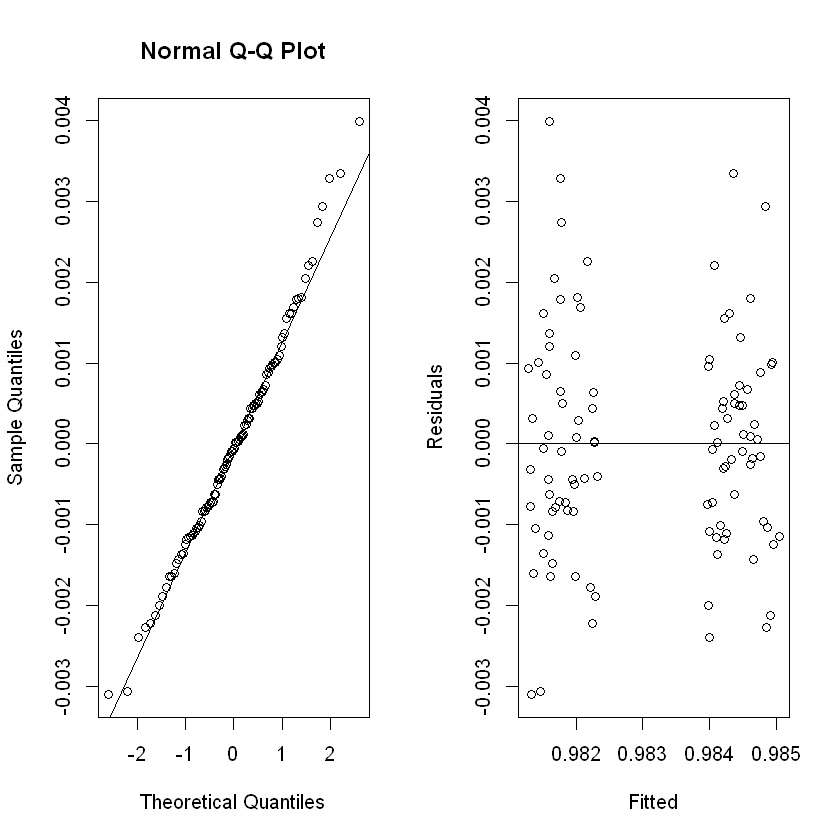

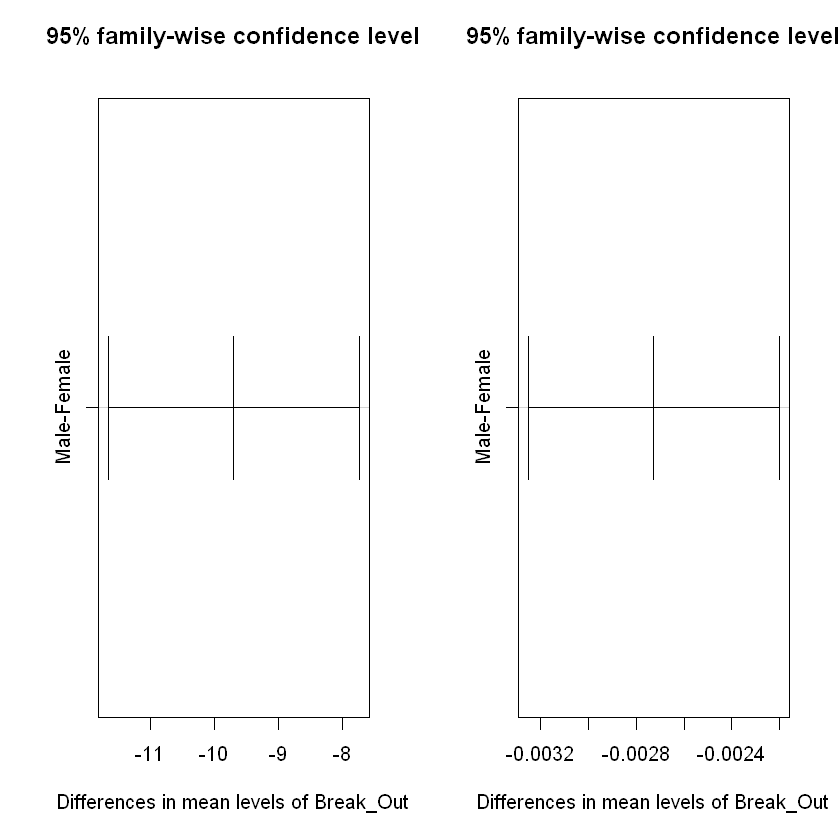

In [111]:
data = read.csv("C:/Users/Jun/Desktop/Courses/Datathon/NeverSmoke20Gender.csv")
#data = read.csv("C:/Users/Jun/Desktop/Courses/Datathon/isCurrent2019Age.csv")
#data = read.csv("C:/Users/Jun/Desktop/Courses/Datathon/isCurrent2018Age.csv")
data$Break_Out=factor(data$Break_Out)
par(mfrow=c(1,2))
plot(Data_value~Break_Out,data,xlab="Gender",ylab="Percentage of Never Smoke")
stripchart(Data_value~Break_Out,data,vertical=TRUE,method="stack",xlab="Gender",ylab="Percentage of Never Smoke")
print("----------ANOVA with intercept----------")
print("if P(>F)<0.05, there is indeed a difference in the levels.")
lm = lm(Data_value~Break_Out,data)
#summary(lm)
anova(lm)
print("----------Fited model without intercept----------")
lmodi = lm(Data_value~Break_Out-1,data)
summary(lmodi)
print("----------Fited model without intercept ANOVA----------")
lmnull=lm(Data_value~1,data)
anova(lmnull,lmodi)
qqnorm(residuals(lm))
qqline(residuals(lm))
plot(jitter(fitted(lm)),residuals(lm),xlab="Fitted",ylab="Residuals")+abline(h=0)
print("----------Levene's Test----------")
print("if P(>F)>0.05, there is no evidence of non-constant variance.")
med = with(data,tapply(Data_value,Break_Out,median))
ar = with(data,abs(Data_value-med[Break_Out]))
anova(lm(ar~Break_Out,data))

print("----------Transformation----------")
require(MASS)
boxcox(lm,plotit=T,lambda=seq(1.5,3.3,by=0.01))
lmtr = lm(-(Data_value^(-1)-1)~Break_Out,data)
summary(lmtr)
par(mfrow=c(1,2))
qqnorm(residuals(lmtr))
qqline(residuals(lmtr))
plot(jitter(fitted(lmtr)),residuals(lmtr),xlab="Fitted",ylab="Residuals")+abline(h=0)
print("----------Levene's Test with Transformation----------")
print("if P(>F)>0.05, there is no evidence of non-constant variance.")
medtr = with(data,tapply(-(Data_value^(-1)-1),Break_Out,median))
artr = with(data,abs(-(Data_value^(-1)-1)-medtr[Break_Out]))
anova(lm(artr~Break_Out,data))

print("----------Comparison Test----------")
library(PMCMRplus)
vartest=anova(lm(ar~Break_Out,data))
if(vartest$`Pr(>F)`[1]<0.05){
    print("----------Non-constant Var----------")
    summary(tamhaneT2Test(data$Data_value,data$Break_Out))
}else{
    print("----------Constant Var----------")
    print(tci <- TukeyHSD(aov(Data_value~Break_Out,data)))
    plot(tci)
    print(tci <- TukeyHSD(aov(-(Data_value^(-1)-1)~Break_Out,data)))
    plot(tci)
    
}

[1] "----------ANOVA with intercept----------"
[1] "if P(>F)<0.05, there is indeed a difference in the levels."


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Break_Out,4,6357.079,1589.26984,32.78187,3.929354e-22
Residuals,260,12604.837,48.48014,NA,NA


[1] "----------Fited model without intercept----------"



Call:
lm(formula = Data_value ~ Break_Out - 1, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-26.6289  -4.3362  -0.7662   3.7938  24.3662 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
Break_Out$15,000-$24,999    51.7938     0.9564   54.15   <2e-16 ***
Break_Out$25,000-$34,999    54.6662     0.9564   57.16   <2e-16 ***
Break_Out$35,000-$49,999    57.0309     0.9564   59.63   <2e-16 ***
Break_Out$50,000+           63.8606     0.9564   66.77   <2e-16 ***
Break_OutLess than $15,000  49.7289     0.9564   51.99   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.963 on 260 degrees of freedom
Multiple R-squared:  0.9849,	Adjusted R-squared:  0.9846 
F-statistic:  3383 on 5 and 260 DF,  p-value: < 2.2e-16


[1] "----------Fited model without intercept ANOVA----------"


Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
264,18961.92,NA,NA,NA,NA
260,12604.84,4,6357.079,32.78187,3.929354e-22


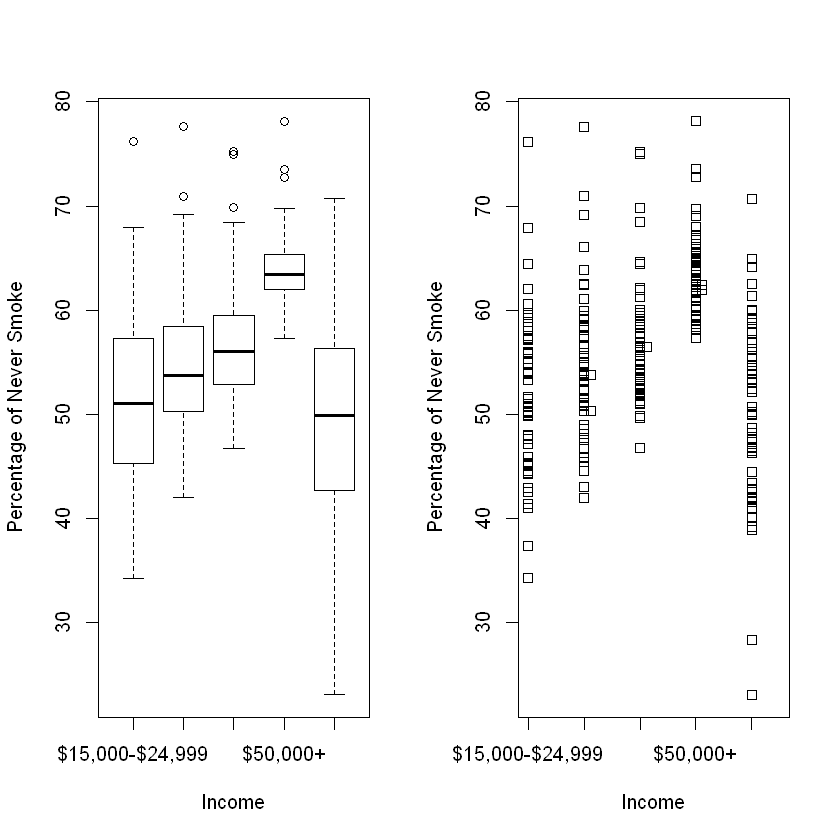

integer(0)

[1] "----------Levene's Test----------"
[1] "if P(>F)>0.05, there is no evidence of non-constant variance."


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Break_Out,4,632.4886,158.1221,7.947153,4.660455e-06
Residuals,260,5173.1428,19.8967,NA,NA


[1] "----------Transformation----------"



Call:
lm(formula = 1/1.5 * (Data_value^(1.5) - 1) ~ Break_Out, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-162.694  -33.046   -7.276   26.901  192.545 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 249.885      7.041  35.491  < 2e-16 ***
Break_Out$25,000-$34,999     20.534      9.957   2.062 0.040179 *  
Break_Out$35,000-$49,999     37.664      9.957   3.783 0.000193 ***
Break_Out$50,000+            90.131      9.957   9.052  < 2e-16 ***
Break_OutLess than $15,000  -13.842      9.957  -1.390 0.165658    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 51.26 on 260 degrees of freedom
Multiple R-squared:  0.3365,	Adjusted R-squared:  0.3263 
F-statistic: 32.97 on 4 and 260 DF,  p-value: < 2.2e-16


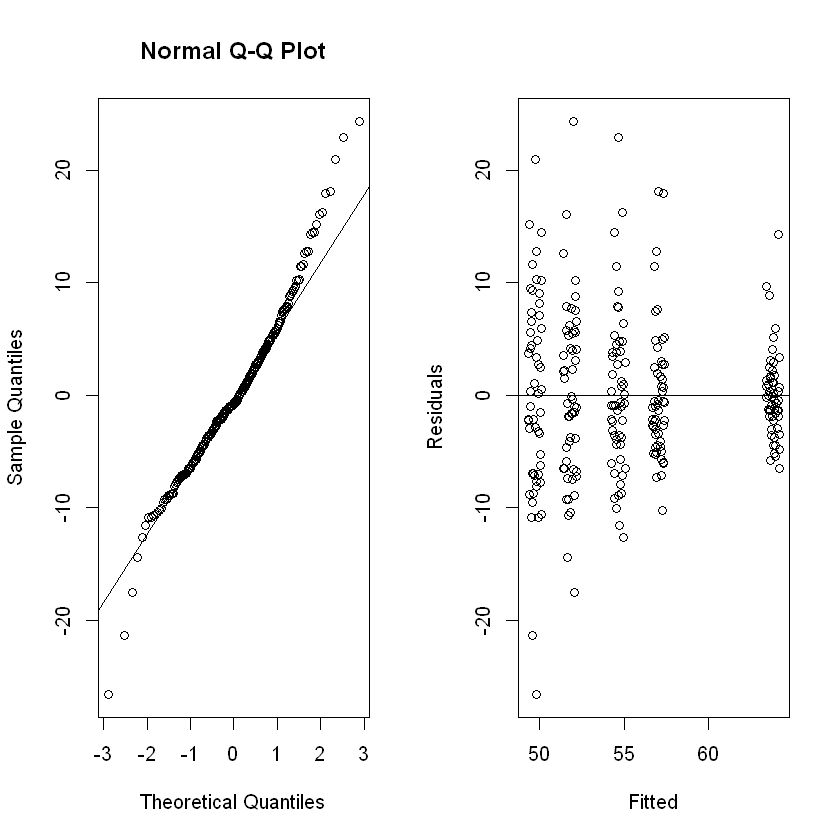

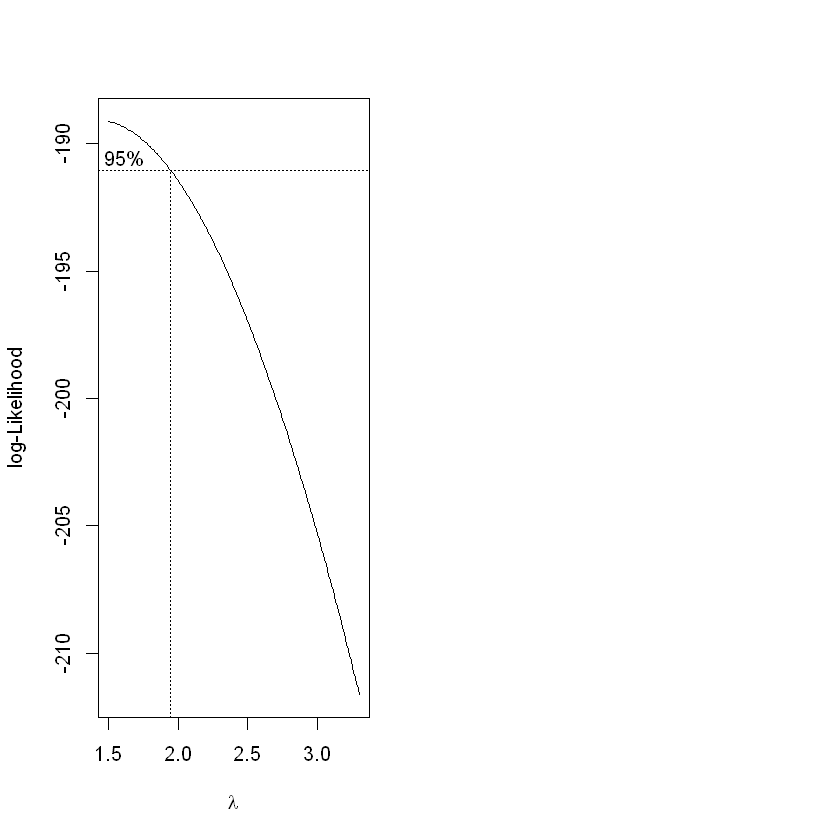

integer(0)

[1] "----------Levene's Test with Transformation----------"
[1] "if P(>F)>0.05, there is no evidence of non-constant variance."


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Break_Out,4,25759.91,6439.979,5.714793,0.0002010581
Residuals,260,292993.01,1126.896,NA,NA


[1] "----------Comparison Test----------"
[1] "----------Non-constant Var----------"



	Pairwise comparisons using Tamhane's T2-test for unequal variances

data: data$Data_value and data$Break_Out
alternative hypothesis: two.sided
P value adjustment method: T2 (Sidak)
H0


                                         t value   Pr(>|t|)    
$25,000-$34,999 - $15,000-$24,999 == 0     1.991  0.3959588    
$35,000-$49,999 - $15,000-$24,999 == 0     3.918  0.0016688  **
$50,000+ - $15,000-$24,999 == 0           10.088 9.9920e-15 ***
Less than $15,000 - $15,000-$24,999 == 0  -1.257  0.9074419    
$35,000-$49,999 - $25,000-$34,999 == 0     1.878  0.4795023    
$50,000+ - $25,000-$34,999 == 0            8.296 1.9310e-11 ***
Less than $15,000 - $25,000-$34,999 == 0  -3.124  0.0232218   *
$50,000+ - $35,000-$49,999 == 0            7.069 3.1169e-09 ***
Less than $15,000 - $35,000-$49,999 == 0  -4.920 3.9592e-05 ***
Less than $15,000 - $50,000+ == 0        -10.399 6.6613e-15 ***


---
Signif. codes: 0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


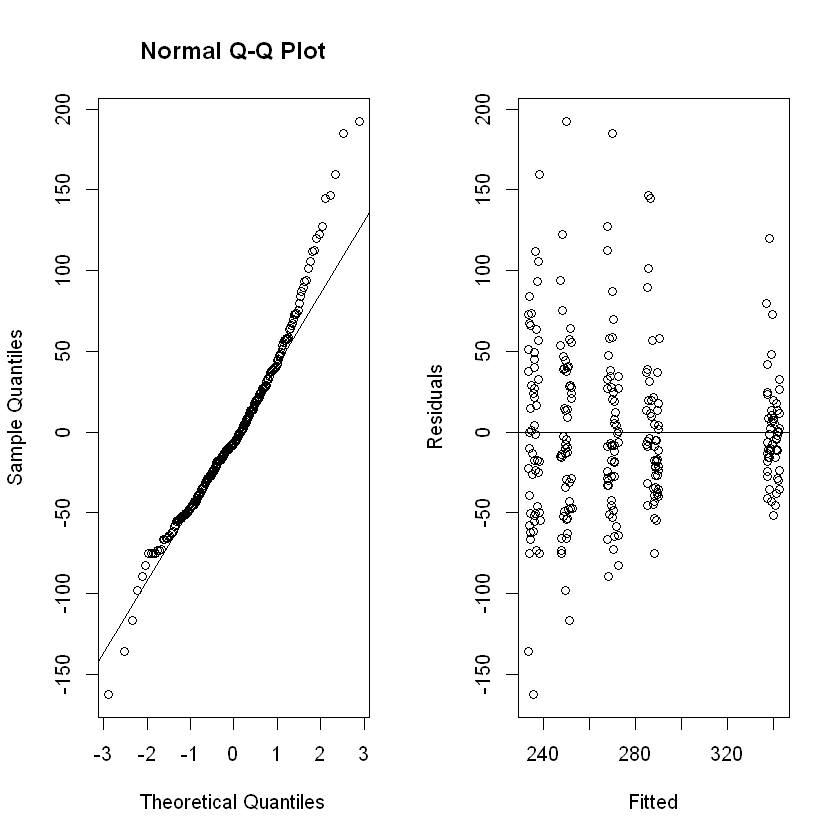

In [114]:
data = read.csv("C:/Users/Jun/Desktop/Courses/Datathon/NeverSmoke20Income.csv")
#data = read.csv("C:/Users/Jun/Desktop/Courses/Datathon/isCurrent2019Age.csv")
#data = read.csv("C:/Users/Jun/Desktop/Courses/Datathon/isCurrent2018Age.csv")
data$Break_Out=factor(data$Break_Out)
par(mfrow=c(1,2))
plot(Data_value~Break_Out,data,xlab="Income",ylab="Percentage of Never Smoke")
stripchart(Data_value~Break_Out,data,vertical=TRUE,method="stack",xlab="Income",ylab="Percentage of Never Smoke")
print("----------ANOVA with intercept----------")
print("if P(>F)<0.05, there is indeed a difference in the levels.")
lm = lm(Data_value~Break_Out,data)
#summary(lm)
anova(lm)
print("----------Fited model without intercept----------")
lmodi = lm(Data_value~Break_Out-1,data)
summary(lmodi)
print("----------Fited model without intercept ANOVA----------")
lmnull=lm(Data_value~1,data)
anova(lmnull,lmodi)
qqnorm(residuals(lm))
qqline(residuals(lm))
plot(jitter(fitted(lm)),residuals(lm),xlab="Fitted",ylab="Residuals")+abline(h=0)
print("----------Levene's Test----------")
print("if P(>F)>0.05, there is no evidence of non-constant variance.")
med = with(data,tapply(Data_value,Break_Out,median))
ar = with(data,abs(Data_value-med[Break_Out]))
anova(lm(ar~Break_Out,data))

print("----------Transformation----------")
require(MASS)
boxcox(lm,plotit=T,lambda=seq(1.5,3.3,by=0.01))
lmtr = lm(1/1.5*(Data_value^(1.5)-1)~Break_Out,data)
summary(lmtr)
par(mfrow=c(1,2))
qqnorm(residuals(lmtr))
qqline(residuals(lmtr))
plot(jitter(fitted(lmtr)),residuals(lmtr),xlab="Fitted",ylab="Residuals")+abline(h=0)
print("----------Levene's Test with Transformation----------")
print("if P(>F)>0.05, there is no evidence of non-constant variance.")
medtr = with(data,tapply(1/1.5*(Data_value^(1.5)-1),Break_Out,median))
artr = with(data,abs(1/1.5*(Data_value^(1.5)-1)-medtr[Break_Out]))
anova(lm(artr~Break_Out,data))

print("----------Comparison Test----------")
library(PMCMRplus)
vartest=anova(lm(ar~Break_Out,data))
if(vartest$`Pr(>F)`[1]<0.05){
    print("----------Non-constant Var----------")
    summary(tamhaneT2Test(data$Data_value,data$Break_Out))
}else{
    print("----------Constant Var----------")
    print(tci <- TukeyHSD(aov(Data_value~Break_Out,data)))
    plot(tci)
    print(tci <- TukeyHSD(aov(1/1.5*(Data_value^(1.5)-1)~Break_Out,data)))
    plot(tci)
    
}

[1] "----------ANOVA with intercept----------"
[1] "if P(>F)<0.05, there is indeed a difference in the levels."


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Break_Out,3,19578.686,6526.22850,153.0508,2.195388e-52
Residuals,208,8869.313,42.64093,NA,NA


[1] "----------Fited model without intercept----------"



Call:
lm(formula = Data_value ~ Break_Out - 1, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-20.875  -3.418  -0.651   3.314  21.755 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
Break_OutCollege graduate   72.827      0.897   81.19   <2e-16 ***
Break_OutH.S. or G.E.D.     54.504      0.897   60.76   <2e-16 ***
Break_OutLess than H.S.     46.295      0.897   51.61   <2e-16 ***
Break_OutSome post-H.S.     58.599      0.897   65.33   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.53 on 208 degrees of freedom
Multiple R-squared:  0.9881,	Adjusted R-squared:  0.9878 
F-statistic:  4304 on 4 and 208 DF,  p-value: < 2.2e-16


[1] "----------Fited model without intercept ANOVA----------"


Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
211,28447.998,NA,NA,NA,NA
208,8869.313,3,19578.69,153.0508,2.195388e-52


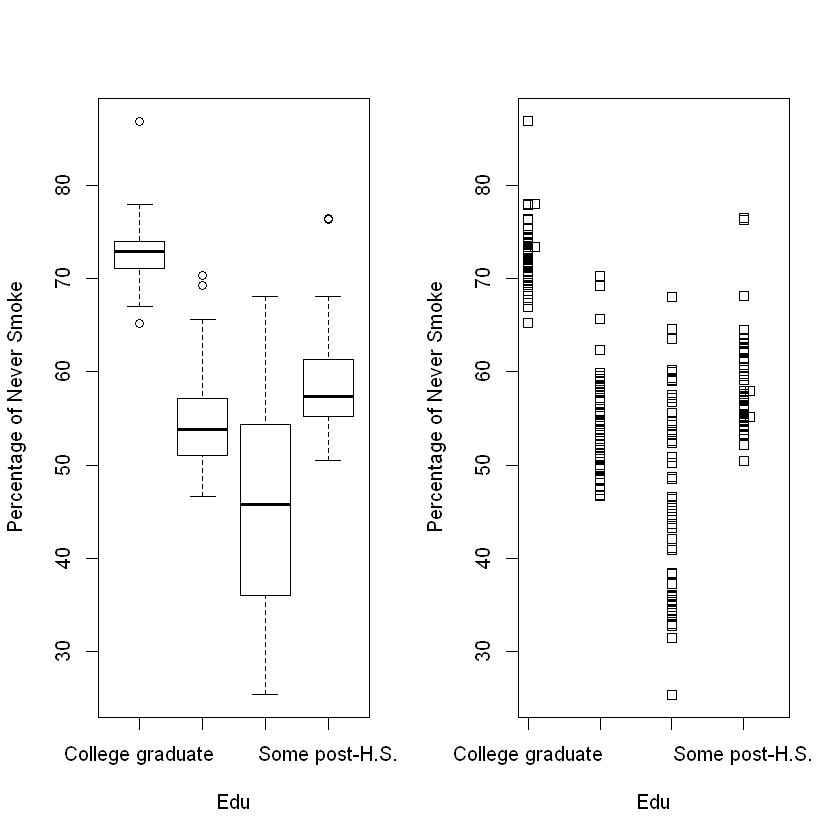

integer(0)

[1] "----------Levene's Test----------"
[1] "if P(>F)>0.05, there is no evidence of non-constant variance."


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Break_Out,3,1314.733,438.24424,29.99534,3.710579e-16
Residuals,208,3038.966,14.61041,NA,NA


[1] "----------Transformation----------"



Call:
lm(formula = 1/2.25 * (Data_value^(2.25) - 1) ~ Break_Out, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2012.0  -579.3  -152.8   467.0  3413.4 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)               6906.0      131.5   52.53   <2e-16 ***
Break_OutH.S. or G.E.D.  -3276.6      185.9  -17.62   <2e-16 ***
Break_OutLess than H.S.  -4249.6      185.9  -22.86   <2e-16 ***
Break_OutSome post-H.S.  -2638.9      185.9  -14.19   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 957 on 208 degrees of freedom
Multiple R-squared:  0.7342,	Adjusted R-squared:  0.7303 
F-statistic: 191.5 on 3 and 208 DF,  p-value: < 2.2e-16


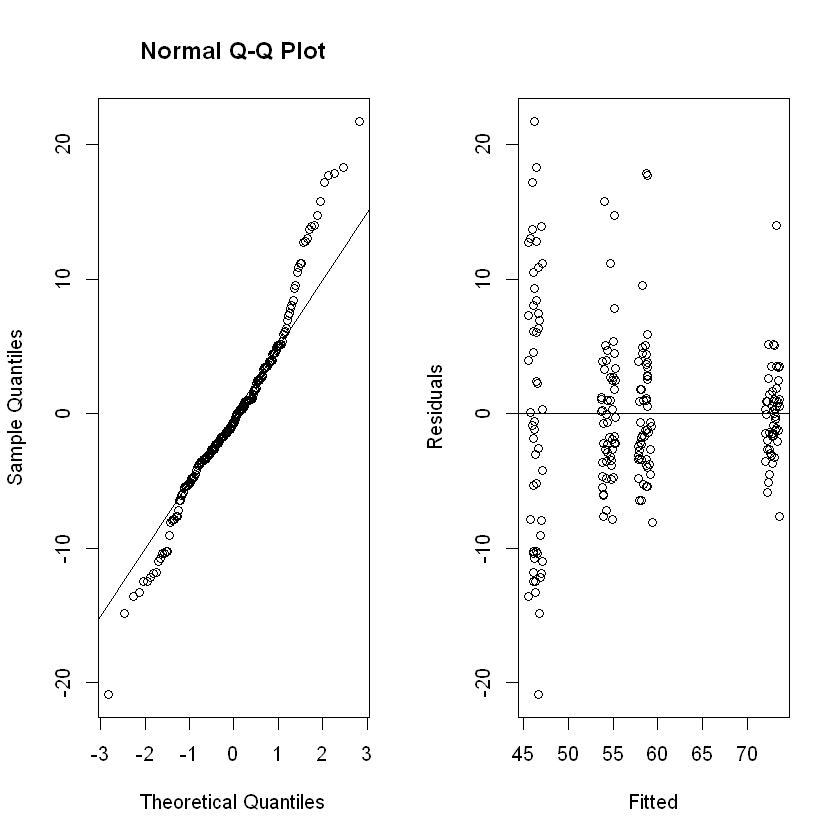

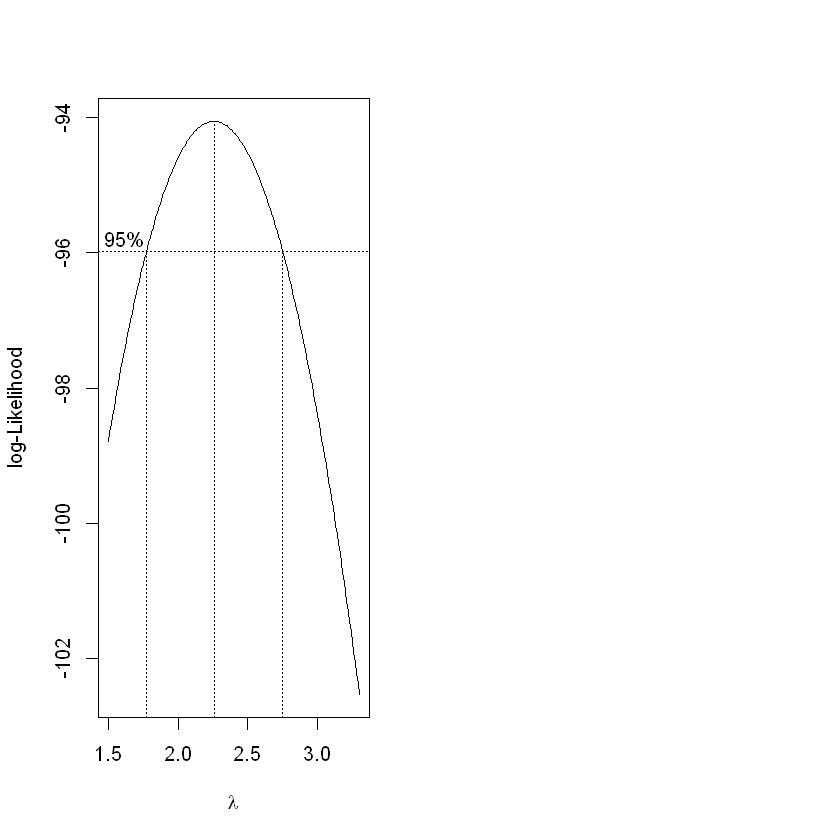

integer(0)

[1] "----------Levene's Test with Transformation----------"
[1] "if P(>F)>0.05, there is no evidence of non-constant variance."


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Break_Out,3,10919229,3639742.9,8.937245,1.349907e-05
Residuals,208,84709165,407255.6,NA,NA


[1] "----------Comparison Test----------"
[1] "----------Non-constant Var----------"



	Pairwise comparisons using Tamhane's T2-test for unequal variances

data: data$Data_value and data$Break_Out
alternative hypothesis: two.sided
P value adjustment method: T2 (Sidak)
H0


                                       t value   Pr(>|t|)    
H.S. or G.E.D. - College graduate == 0 -22.035 < 2.22e-16 ***
Less than H.S. - College graduate == 0 -17.715 < 2.22e-16 ***
Some post-H.S. - College graduate == 0 -16.878 < 2.22e-16 ***
Less than H.S. - H.S. or G.E.D. == 0    -5.184 1.0639e-05 ***
Some post-H.S. - H.S. or G.E.D. == 0     4.147 0.00041347 ***
Some post-H.S. - Less than H.S. == 0     7.740 2.0695e-10 ***


---
Signif. codes: 0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


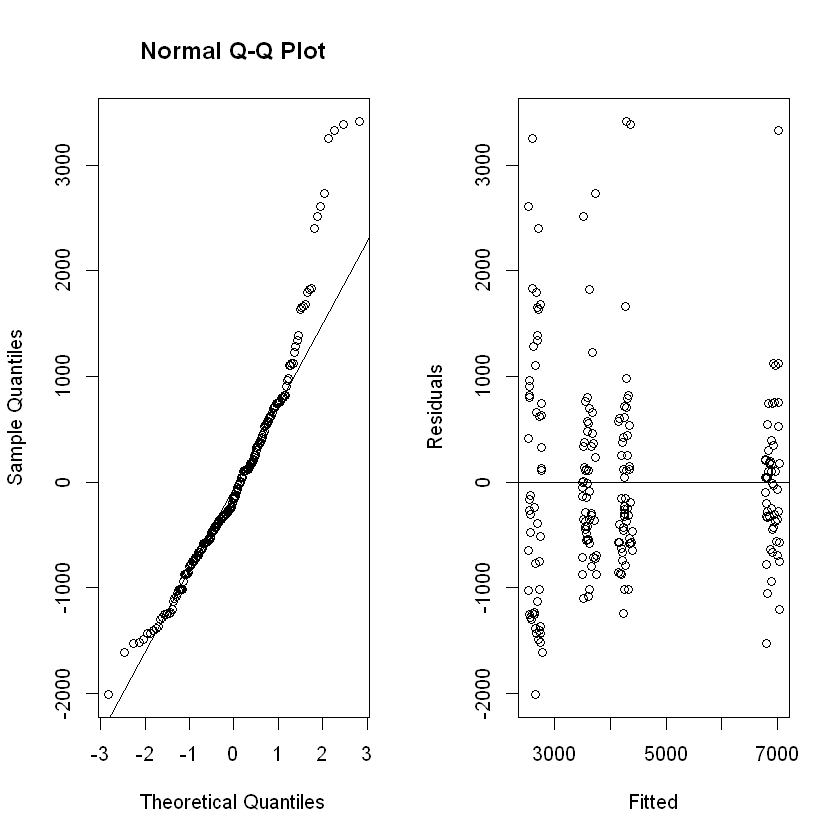

In [116]:
data = read.csv("C:/Users/Jun/Desktop/Courses/Datathon/NeverSmoke20Edu.csv")
#data = read.csv("C:/Users/Jun/Desktop/Courses/Datathon/isCurrent2019Age.csv")
#data = read.csv("C:/Users/Jun/Desktop/Courses/Datathon/isCurrent2018Age.csv")
data$Break_Out=factor(data$Break_Out)
par(mfrow=c(1,2))
plot(Data_value~Break_Out,data,xlab="Edu",ylab="Percentage of Never Smoke")
stripchart(Data_value~Break_Out,data,vertical=TRUE,method="stack",xlab="Edu",ylab="Percentage of Never Smoke")
print("----------ANOVA with intercept----------")
print("if P(>F)<0.05, there is indeed a difference in the levels.")
lm = lm(Data_value~Break_Out,data)
#summary(lm)
anova(lm)
print("----------Fited model without intercept----------")
lmodi = lm(Data_value~Break_Out-1,data)
summary(lmodi)
print("----------Fited model without intercept ANOVA----------")
lmnull=lm(Data_value~1,data)
anova(lmnull,lmodi)
qqnorm(residuals(lm))
qqline(residuals(lm))
plot(jitter(fitted(lm)),residuals(lm),xlab="Fitted",ylab="Residuals")+abline(h=0)
print("----------Levene's Test----------")
print("if P(>F)>0.05, there is no evidence of non-constant variance.")
med = with(data,tapply(Data_value,Break_Out,median))
ar = with(data,abs(Data_value-med[Break_Out]))
anova(lm(ar~Break_Out,data))

print("----------Transformation----------")
require(MASS)
boxcox(lm,plotit=T,lambda=seq(1.5,3.3,by=0.01))
lmtr = lm(1/2.25*(Data_value^(2.25)-1)~Break_Out,data)
summary(lmtr)
par(mfrow=c(1,2))
qqnorm(residuals(lmtr))
qqline(residuals(lmtr))
plot(jitter(fitted(lmtr)),residuals(lmtr),xlab="Fitted",ylab="Residuals")+abline(h=0)
print("----------Levene's Test with Transformation----------")
print("if P(>F)>0.05, there is no evidence of non-constant variance.")
medtr = with(data,tapply(1/2.25*(Data_value^(2.25)-1),Break_Out,median))
artr = with(data,abs(1/2.25*(Data_value^(2.25)-1)-medtr[Break_Out]))
anova(lm(artr~Break_Out,data))

print("----------Comparison Test----------")
library(PMCMRplus)
vartest=anova(lm(ar~Break_Out,data))
if(vartest$`Pr(>F)`[1]<0.05){
    print("----------Non-constant Var----------")
    summary(tamhaneT2Test(data$Data_value,data$Break_Out))
}else{
    print("----------Constant Var----------")
    print(tci <- TukeyHSD(aov(Data_value~Break_Out,data)))
    plot(tci)
    print(tci <- TukeyHSD(aov(1/2.25*(Data_value^(2.25)-1)~Break_Out,data)))
    plot(tci)
    
}